


## Agenda
        1 - Visão geral (uma breve exploração)
        2 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
            2.1 Opções de "Como prodecer?"
            2.2 Análise da 1ª filtragem
            2.3 Procedimentos avançados
            2.4 Solução (parte 1)
            2.5 Casas para reformar
                2.5.1 Ganhando $$ nos locais de luxo
                2.5.2 Solução (parte 2)
            2.6 "Reutilizando a separação de bairros da solução 1"
                2.6.1 Solução (parte 3)
        3 - A House Rocket deveria fazer uma reforma para aumentar o preço da venda?
            3.1 Análise de dados simples
            3.2 Testando correlações
            3.3 Feature Engineering
            3.4 Solução      
        4 - Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?
            4.1 Testando nas casas recomendadas.
            4.2 Mudanças
                4.2.1 Isoladas
                4.2.2 renovated e condition
                4.2.3 renovated, condition e grade
                4.2.4 renovated, condition, grade e view
                4.2.5 renovated, condition e view
                4.2.6 view e grade
                4.2.7 renovated e grade
                4.2.8 renovated e view
                4.2.9 renovated, view e grade
            4.3 Solução

Columns summary/ Variable explanation:
    
    id - Unique ID for each home sold

    date - Date of the home sale

    price - Price of each home sold

    bedrooms - Number of bedrooms

    bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

    sqft_living - Square footage of the apartments interior living space

    sqft_lot - Square footage of the land space

    floors - Number of floors

    waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

    view - An index from 0 to 4 of how good the view of the property was

    condition - An index from 1 to 5 on the condition of the apartment,

    grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

    sqft_above - The square footage of the interior housing space that is above ground level

    sqft_basement - The square footage of the interior housing space that is below ground level

    yr_built - The year the house was initially built

    yr_renovated - The year of the house’s last renovation

    zipcode - What zipcode area the house is in

    lat - Lattitude

    long - Longitude

    sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

    sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error, mean_absolute_error, max_error

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.date = pd.to_datetime(raw_data.date)
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1 - Visão geral (uma breve exploração)

    Nenhum NaN.
    Tipos dos dados... ok.
    Algumas anomalias encontradas, como número de quarto e banheiro iguais a 0 e
    33 quartos em uma casa? .-. uau kkkk.

Acredito que é possível dar um norte à resposta da primeira questão por meio de uma análise simples mas profunda. É o que iniciarei a seguir. Já para as outras perguntas, penso em criar um modelo que preveja (inicialmente) o preço das casas e então lapidar soluções a partir dele.

In [4]:
raw_data.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2 - Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
### 2.1 Opções de "Como prodecer?"
Lembrando que _"A principal estratégia da corporação é **comprar boas casas em ótimas localizações com preços baixos** e depois revendê-las a preços mais altos"_ , considerarei isso na busca por essas casas.

> Primeiramente, separando as casas com preços mais baixos e estimando quais tendem a valorizar de acordo com suas características (inclusive caso a empresa decida fazer uma reforma).

In [7]:
cheap_houses = raw_data[(raw_data.price < raw_data.price.median())]

Temos muitíssimas casas com nota 0 para a vista. Por hora, vamos ignorá-la da equação.
> view - An index from 0 to 4 of how good the view of the property was

In [8]:
cheap_houses.groupby('view').count().id

view
0    10348
1       63
2      197
3       70
4       14
Name: id, dtype: int64

**Podemos segregar os dados de acordo com a condição do imóvel (considerando que uma reforma possa aumentar o preço de venda, focaremos nos imóveis "não tão atraentes", mas com potencial de trazer grandes retornos).**
> condition - An index from 1 to 5 on the condition of the apartment

**O mesmo para a avaliação do design.**
> grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

In [9]:
cheap_houses.groupby('condition').count().id

condition
1      25
2     140
3    6908
4    2919
5     700
Name: id, dtype: int64

In [10]:
cheap_houses.groupby('grade').count().id

grade
1        1
3        3
4       29
5      229
6     1812
7     6090
8     2239
9      276
10      12
11       1
Name: id, dtype: int64

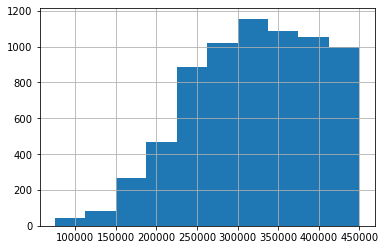

In [11]:
cheap_houses = cheap_houses[(cheap_houses.condition < 4) & (cheap_houses.grade < 10)]
cheap_houses.price.hist()
plt.show()

Nos gráficos abaixo observamos que o número de propriedades varia bastante de região para região. E como consequência, é possível encontrar preços mínimos bem altos para locais com poucas casas (exemplos: zipcodes 98004, 98005, 98075...). No 3º plot conseguimos ver bem essa diferenciação.

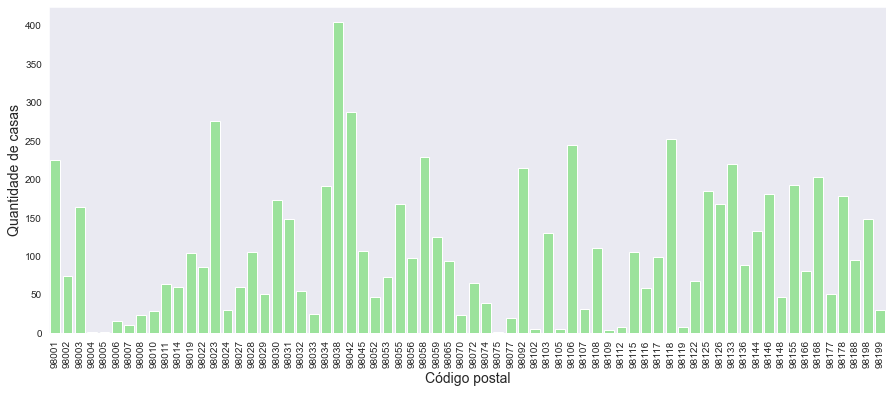

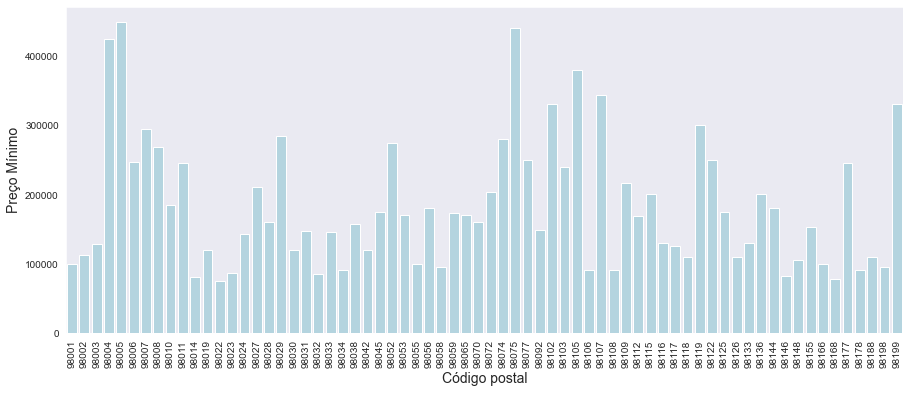

In [12]:
data = cheap_houses.groupby('zipcode', as_index = False).agg({'id': 'count', 'price': 'min'})\
.sort_values('price', ascending = False)

sns.set_style('dark')
fig = plt.figure(figsize = (15, 6))
ax = sns.barplot(x = 'zipcode', y = 'id', data = data, color = 'lightgreen')
plt.xticks(rotation = 90)
plt.ylabel('Quantidade de casas', fontsize=14)
plt.xlabel('Código postal', fontsize=14)
plt.show()

fig = plt.figure(figsize = (15, 6))
ax = sns.barplot(x = 'zipcode', y = 'price', data = data, color = 'lightblue')
plt.xticks(rotation = 90)
plt.ylabel('Preço Mínimo', fontsize=14)
plt.xlabel('Código postal', fontsize=14)
plt.show()

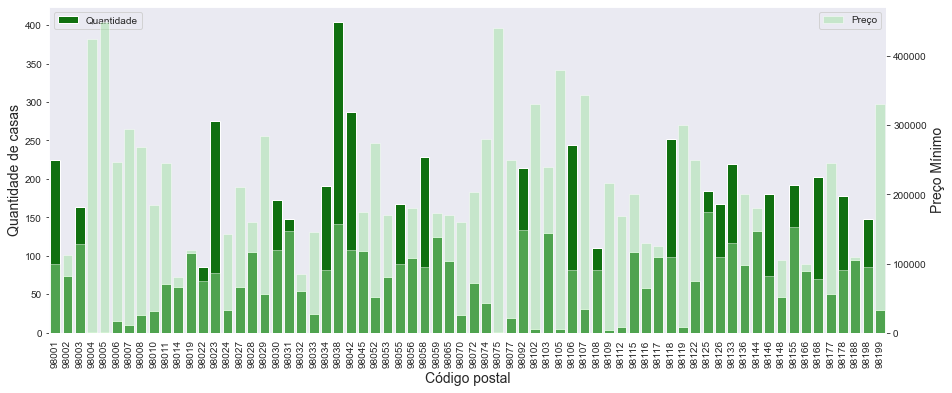

In [13]:
fig = plt.figure(figsize = (15, 6))
ax = sns.barplot(x = 'zipcode', y = 'id', data = data, label='Quantidade', color = 'green')
plt.xticks(rotation = 90)
plt.ylabel('Quantidade de casas', fontsize=14)
plt.xlabel('Código postal', fontsize=14)
plt.legend(loc="upper left")
sns.barplot(x = 'zipcode', y = 'price', data = data, label='Preço', ax=ax.twinx(), color = 'lightgreen',alpha = .45)
plt.ylabel('Preço Mínimo', fontsize=14)
plt.legend()
plt.show()

### 2.2 Análise da 1ª filtragem
Nota: como especifiquei o preço, voltei a utilizar raw_data, se bem que o ganho de dados foi bem pequeno.

Nesta primeira escolha, meu pensamento foi separar casas:
    
> **Reformadas recentemente, logo, não precisam ser reformadas.
Apenas revendidas quando valorizadas.**
>
> Que talvez não precisem de reforma, por ter recebido um reforma relativamente recente. 
>
> Antigas, teoricamente têm preços mais baixos, mas talvez precisem de reforma.
>
> **Antigas e em ótimas condições**

Mas, porém, entretanto, todavia, as hipóteses foram por água abaixo...

In [14]:
# Reformadas recentemente, não precisa reformar
len(raw_data[(raw_data.yr_renovated > 2010) & (raw_data.price < 300000)])

23

In [15]:
# Talvez não precise de reforma 
len(raw_data[(raw_data.yr_renovated > 2005) & (raw_data.yr_renovated < 2011) & (raw_data.price < 300000)])

12

In [16]:
# Preços mais baixos? talvez precise de reforma
len(raw_data[(raw_data.yr_built < 1950) & (raw_data.yr_renovated > 2000) & (raw_data.yr_renovated < 2006) 
                 & (raw_data.price < 300000)])

5

In [17]:
# Antigas (preços mais baixos) em ótimas condições
len(raw_data[(raw_data.yr_built < 1950) & (raw_data.condition > 4) & (raw_data.price < 200000)])

24

**...ao examinar as condições de cada uma, vi que a grande maioria está dentro da média 3. E como no momento não tenho uma boa noção de quanta influência essa nota tem na questão de negócio real, ou seja, o quanto nota 3 de condição afeta a venda da casa... decidi partir para um procedimento mais "avançado" e (por hora) esquecer essas soluções.**

In [18]:
raw_data[(raw_data.yr_renovated > 2010) & (raw_data.price < 300000)].condition.mean()

3.0869565217391304

In [19]:
raw_data[(raw_data.yr_renovated > 2005) & (raw_data.yr_renovated < 2011) & (raw_data.price < 300000)].condition

2165     3
2938     4
8129     3
9571     3
11780    3
12984    3
13724    3
15445    3
16846    3
17145    3
18719    3
20962    3
Name: condition, dtype: int64

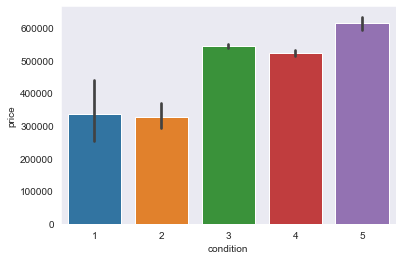

In [20]:
sns.barplot(raw_data.condition, raw_data.price)
plt.show()

In [21]:
# Uma amplitude muito grande no preço
raw_data[raw_data.condition == 3].price.max() - raw_data[raw_data.condition == 3].price.min()

6987500.0

### 2.3 Procedimentos avançados

Podemos decidir quais observações manter considerando que uma casa boa para revender apresente estas características:
    
        Um preço baixo, mas que esteja em um local "valorizando".
        E boas condições, não necessitando gastos com reformas.

Além disso, alguns fatores extras a se utilizar são:

        O m² da casa ter um valor próximo aos dos vizinhos
        (o que representaria uma equivalência entre o padrão das casas).
        A avaliação do design, tende a ser um fator forte a se ponderar.
        E por fim, casas com pelo menos 50 anos (seja de construção ou de reformas).

Portanto, a escolha foi feito com base em:

> Manter casas com diferença absoluta de no máximo 200m² entre seus vizinhos.
>
> Preços abaixo da mediana dos preços dos dados.
>
> Casas com realmente boas condições (4 ou 5).
>
> E com design bem próximo ou acima da média.
>
> Além de ter no máximo 50 anos de construção ou reforma.

In [22]:
# Diferença méda da metragem entre as casas e seus 15 vizinhos.
neighbors_sqft_diff = abs(raw_data.sqft_living - raw_data.sqft_living15)
neighbors_sqft_diff.mean() # 392.45
neighbors_sqft_diff.median()

260.0

In [23]:
houses_to_buy = raw_data[(abs(raw_data.sqft_living - raw_data.sqft_living15)<200) & (raw_data.price < raw_data.price.median())]
houses_to_buy = houses_to_buy[(houses_to_buy.condition > 3) & (houses_to_buy.grade > 7)]
houses_to_buy = houses_to_buy[(2015 - houses_to_buy.yr_built <= 50) | (2015 - houses_to_buy.yr_renovated <= 50)]
len(houses_to_buy)

183

Agora podemos comparar bairros da nossa lista com bairros mais luxuosos, examinar e buscar insights.

Pensando sobre boas localizações e considerando que os preços mínimos mais altos se encontram nos locais mais luxuosos... é possível imaginarmos que tais lugares são, teoricamente, mais seguros e oferecem uma qualidade de vida melhor (o que os tornam mais valorizados e caros). Logo, como separamos as casas mais baratas, talvez signifique que se elas estiverem nesse ambiente provavelmente têm mais chances de serem valorizadas no futuro e trazerem grandes retornos financeiros.


In [24]:
raw_data.groupby('zipcode', as_index = False).agg({'id':'count', 'price':'min'}).sort_values('price', ascending=False).head()

,zipcode,id,price
24,98039,50,787500.0
25,98040,282,500000.0
3,98004,317,425000.0
38,98075,359,406430.0
4,98005,168,400000.0


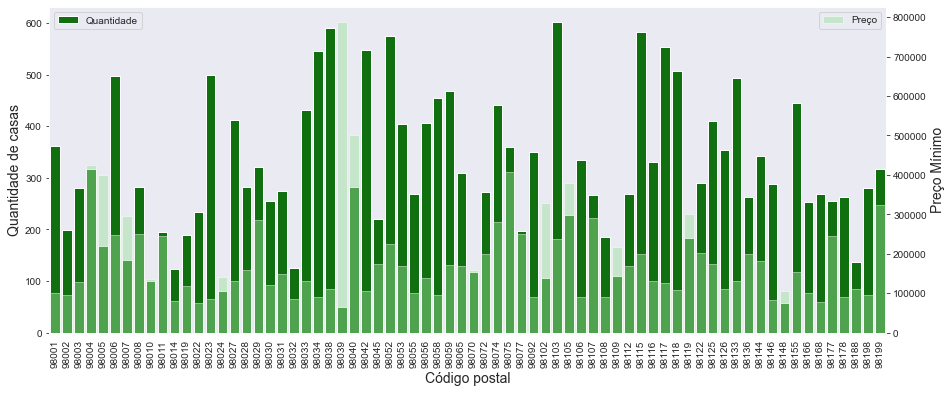

In [25]:
''' Preço Mínimo Mais Alto - Região Mais Luxuosa? '''

data = raw_data.groupby('zipcode', as_index = False).agg({'id': 'count', 'price': 'min'}).sort_values('price')
fig = plt.figure(figsize = (15, 6))
ax = sns.barplot(x = 'zipcode', y = 'id', data = data, label='Quantidade', color = 'green')
plt.xticks(rotation = 90)
plt.ylabel('Quantidade de casas', fontsize=14)
plt.xlabel('Código postal', fontsize=14)
plt.legend(loc="upper left")
sns.barplot(x = 'zipcode', y = 'price', data = data, label='Preço', ax=ax.twinx(), color = 'lightgreen',alpha = .45)
plt.ylabel('Preço Mínimo', fontsize=14)
plt.legend()
plt.show()

In [26]:
# Bairros da nossa lista estão nos bairros mais luxuosos? spoilers: Of course que não.
locations = raw_data.groupby('zipcode', as_index = False).agg({'id': 'count', 'price': 'min'})\
.sort_values('price', ascending=False).head(35)

houses_to_buy_code = []
for location in locations.zipcode:
    if location in houses_to_buy.zipcode.unique():
        houses_to_buy_code.append(location)

locations = locations.set_index('zipcode')

houses_to_buy_code = pd.DataFrame(houses_to_buy_code)
houses_to_buy_code['houses_to_buy_zipcode'] = 1
houses_to_buy_code = houses_to_buy_code.set_index(0)
len(houses_to_buy_code)

11

Por haver 70 bairros, separei pelos 35 mais caros. Aqui, temos uma visão de em quais bairros as casas que separamos estão. E também observamos que essas casas que atualmente se incluem na lista de compra da House Rocket (HR) não estão localizadas nos bairros (teoricamente) mais nobres.

In [27]:
hr_houses = pd.concat([houses_to_buy_code, locations], axis=1).sort_values('price', ascending=False)
hr_houses.fillna(0, inplace = True)
hr_houses.rename(columns = {'id': 'total_id_count', 'price': 'min_price'}, inplace = True)
hr_houses

,houses_to_buy_zipcode,total_id_count,min_price
98039,0.0,50,787500.0
98040,0.0,282,500000.0
98004,0.0,317,425000.0
98075,0.0,359,406430.0
98005,0.0,168,400000.0
98105,0.0,229,380000.0
98102,0.0,105,330000.0
98199,0.0,317,323000.0
98119,0.0,184,300523.0
98007,1.0,141,295000.0


### 2.4 Solução (parte 1)
_Agrupando_ as casas da lista de compra com os atributos iniciais pelo _zipcode_ e organizando pelos _preços mínimos mais altos_... e comparando com a nova lista, cujas as casas se localizam nas 35 localizações mais caras.

Para facilitar a leitura, um sumário:

> _**houses_to_buy_zipcode** --> Confirmação de que as casas estão nos 35 bairros (index | zipcode) mais caros._
>
> ---
> **Informações sobre Todas as casas:**
>
> _**total_id_count** --> Quantidade total de casas naquele bairro._
>
> _**min_price** --> Preço mínimo de uma casa naquele local._
>
>---
> **Informações sobre as casas com qualidades especificadas em _2.3 Procedimentos avançados_ :**
>
> _**hr_id_count** --> Quantidade de casas como os atributos escolhidos._
>
> _**hr_min_price** --> Preço mínimo de uma casa com tais atributos._
>
> _**id_count%** --> Quantidade percentual das casas especificadas em relação à quantidade total de casas no bairro._

In [28]:
houses_to_buy_zipcodes = houses_to_buy.groupby('zipcode', as_index = False).agg({'id': 'count', 'price': 'min'})\
.sort_values('price', ascending=False)

houses_to_buy_zipcodes.set_index('zipcode', inplace=True)
houses_to_buy_zipcodes.rename(columns = {'id': 'hr_id_count', 'price': 'hr_min_price'}, inplace = True)

must_buy = pd.concat([hr_houses, houses_to_buy_zipcodes], axis=1).sort_values('min_price', ascending=False)
must_buy = must_buy[must_buy.houses_to_buy_zipcode == 1]
must_buy['id_count%'] = (must_buy.hr_id_count/must_buy.total_id_count)*100
must_buy

,houses_to_buy_zipcode,total_id_count,min_price,hr_id_count,hr_min_price,id_count%
98007,1.0,141.0,295000.0,3.0,350000.0,2.127660
98074,1.0,441.0,280000.0,2.0,345000.0,0.453515
98077,1.0,198.0,250000.0,1.0,432000.0,0.505051
98177,1.0,255.0,245560.0,2.0,380000.0,0.784314
98011,1.0,195.0,245500.0,1.0,449000.0,0.512821
98052,1.0,574.0,225000.0,7.0,405000.0,1.219512
98122,1.0,290.0,202000.0,1.0,448175.0,0.344828
98072,1.0,273.0,200000.0,2.0,400000.0,0.732601
98059,1.0,468.0,172500.0,9.0,320000.0,1.923077
98028,1.0,283.0,160000.0,3.0,330000.0,1.060071


Perceba que o preço mínimo da nossa lista ( _hr_min_price_ ) está relativamente alto. Por isso, a partir daqui a resposta para a primeira pergunta será divida em 3 partes.

> **Uma tabela com localicade valorizada e preços relativamente altos.**
>
> **Outra com preços mais baixos em locais que (talvez) não valorizem tanto.**
>
> ---
> **(E a última, ainda trabalharemos nela, mas trata-se das casas que uma<br>
reforma possa ajudar a aumentar seu preço de venda e convertê-lo em lucro)**

.

In [29]:
must_buy.index

Int64Index([98007, 98074, 98077, 98177, 98011, 98052, 98122, 98072, 98059,
            98028, 98155],
           dtype='int64')

In [30]:
good_location = houses_to_buy[(houses_to_buy.zipcode == 98007) | (houses_to_buy.zipcode == 98074) | 
                              (houses_to_buy.zipcode == 98077) | (houses_to_buy.zipcode == 98177) | 
                              (houses_to_buy.zipcode == 98011) | (houses_to_buy.zipcode == 98052) |
                              (houses_to_buy.zipcode == 98122) | (houses_to_buy.zipcode == 98072) |
                              (houses_to_buy.zipcode == 98059) | (houses_to_buy.zipcode == 98028) |
                              (houses_to_buy.zipcode == 98155)]
print("good_location", len(good_location))

good_prices = houses_to_buy[houses_to_buy.price < good_location.price.min()]
print("good_prices", len(good_prices))

good_location 34
good_prices 62


good_location -> 34 casas que não necessitam de reforma, estão localizadas em bairros que (teoricamente) tendem a valorizar no decorrer do tempo.

good_prices -> 62 casas que também não necessitam de reforma e que podem valorizar.

**Finalmente, essas informações podem ser salvas em um arquivo e levadas para a equipe de compra que faria uma análise mais detalhada nessas casas potencialmente lucrativas e executaria (ou não) a compra.**

No mapa abaixo, temos em **_azul_** as casas em **_good_location_**.<br>
**_good_prices_** em **_vermelho_** e em violeta os bairros mais luxuosos.

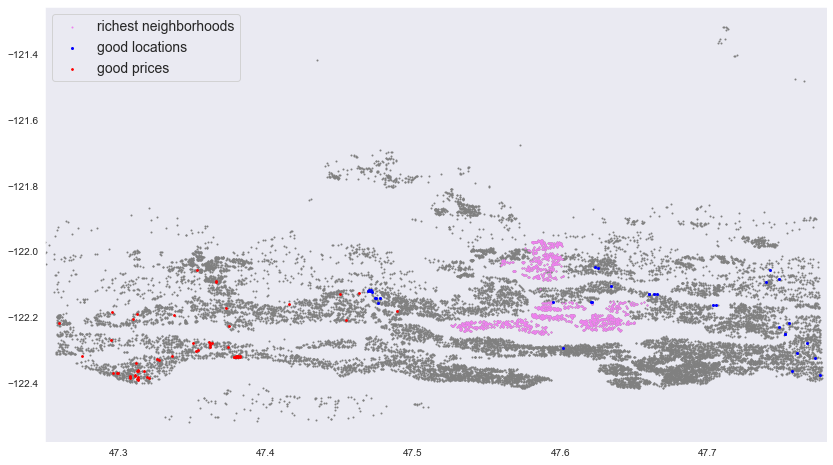

In [34]:
# good_location.to_csv("Boas localizações", index=False) 
# good_prices.to_csv("Bons Preços", index=False)

first_luxury = raw_data[(raw_data.zipcode == 98039 ) ]
second_luxury = raw_data[(raw_data.zipcode == 98040 ) ]
third_luxury = raw_data[(raw_data.zipcode == 98004 ) ]
fourth_luxury = raw_data[(raw_data.zipcode == 98075 ) ]
fifth_luxury = raw_data[(raw_data.zipcode == 98005 ) ]
 
plt.figure(figsize=(14,8))
plt.scatter(raw_data.lat , raw_data.long, color='grey', s=1)
plt.scatter(first_luxury.lat , first_luxury.long, color='violet', s=1)
plt.scatter(second_luxury.lat , second_luxury.long, color='violet', s=1)
plt.scatter(third_luxury.lat , third_luxury.long, color='violet', s=1)
plt.scatter(fourth_luxury.lat , fourth_luxury.long, color='violet', s=1)
plt.scatter(fifth_luxury.lat , fifth_luxury.long, color='violet', s=1, label='richest neighborhoods')
plt.scatter(good_location.lat , good_location.long, color='blue', s=4, label='good locations' )
plt.scatter(good_prices.lat , good_prices.long, color='red', s=3, label='good prices' )
plt.legend(fontsize=14)
plt.xlim((47.25,47.781))
plt.show()

### 2.5 Casas para reformar
O parâmetro inicial (m²) permanecerá o mesmo, porém, iremos atrás de

    Casas em condições de reforma.
    
E faremos a próxima filtragem tanto com base na localização quanto no preço.

#### 2.5.1 Ganhando $$ nos locais de luxo
Neste caso, começarei diretamente com os bairros mais luxuosos, pensando na possibilidade de elevar bastante o valor de venda com uma reforma, já que os imóveis se localizam em locais mais caros naturalmente.

In [35]:
houses_to_reform = raw_data[(abs(raw_data.sqft_living-raw_data.sqft_living15)<200)]
houses_to_reform = houses_to_reform[(houses_to_reform.condition < 4)]
len(houses_to_reform)

6337

In [36]:
raw_data.groupby('zipcode', as_index = False).agg({'id':'count', 'price':'min'}).sort_values('price', ascending=False).head(7)

,zipcode,id,price
24,98039,50,787500.0
25,98040,282,500000.0
3,98004,317,425000.0
38,98075,359,406430.0
4,98005,168,400000.0
43,98105,229,380000.0
41,98102,105,330000.0


In [37]:
houses_to_reform = houses_to_reform[(houses_to_reform.zipcode == 98039) | (houses_to_reform.zipcode == 98040) | 
                                    (houses_to_reform.zipcode == 98004) | (houses_to_reform.zipcode == 98075) | 
                                    (houses_to_reform.zipcode == 98005) | (houses_to_reform.zipcode == 98105) ]
len(houses_to_reform)

281

Mais uma camada de especificação, queremos as casas (dentre essas mais caras) abaixo do preço médio.

In [38]:
houses_to_reform.price.describe()

count    2.810000e+02
mean     8.631379e+05
std      4.041169e+05
min      3.840000e+05
25%      6.450000e+05
50%      7.490000e+05
75%      9.200000e+05
max      3.168750e+06
Name: price, dtype: float64

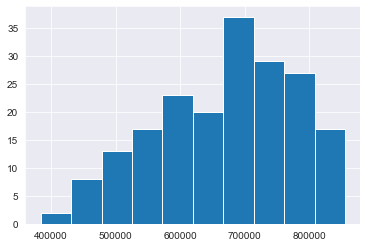

In [39]:
houses_to_reform = houses_to_reform[houses_to_reform.price < houses_to_reform.price.mean()]
houses_to_reform.price.hist()
plt.show()

<font color=red>**Perceba que a nota do design afeta bastante o preço...**</font>

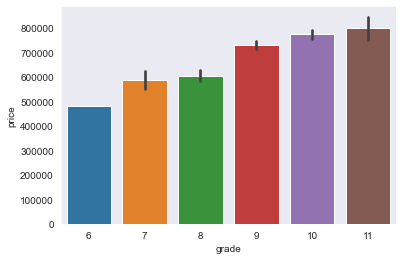

In [40]:
sns.barplot(houses_to_reform.grade, houses_to_reform.price)
plt.show()

<font color=red>**até mesmo nos dados gerais.**</font>

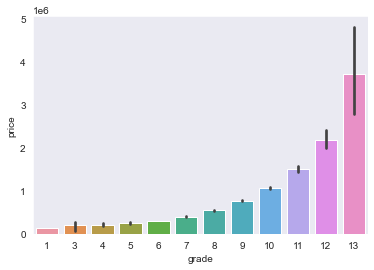

In [41]:
sns.barplot(raw_data.grade, raw_data.price)
plt.show()

<font color=red>**Por isso, a próxima camada a ser pega é a com notas mais baixas.**</font>

In [42]:
houses_to_reform = houses_to_reform[houses_to_reform.grade < 10]
len(houses_to_reform)

156

**E como a condição não influência tanto o preço...**

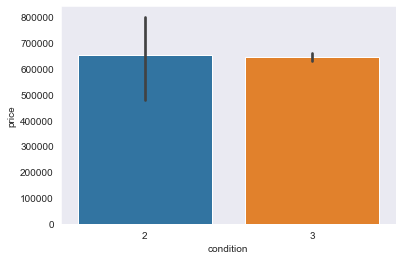

In [43]:
sns.barplot(houses_to_reform.condition, houses_to_reform.price)
plt.show()

**poderíamos manter os dados onde a diferença entre o preço maior e o menor é mais elevada. Ao interpretar que essa situação expressa que "caso uma reforma seja feita, as chances de venda com altos lucros aumentam".**

In [44]:
houses_to_reform.groupby('zipcode', as_index = False).agg({'id':'count', 'price':'min'}).sort_values('price', ascending=False)

,zipcode,id,price
2,98040,6,685000.0
0,98004,10,530000.0
1,98005,20,449228.0
3,98075,85,440000.0
4,98105,35,384000.0


In [45]:
print('zipcode -- preço min -- preço máx --- diferença')
for place in houses_to_reform.zipcode.unique():
    max_price = raw_data[raw_data.zipcode == place].price.max()
    min_price = raw_data[raw_data.zipcode == place].price.min()
    difference = max_price-min_price
    print(f' {place} --- {min_price} --- {max_price} --- {difference}')

zipcode -- preço min -- preço máx --- diferença
 98105 --- 380000.0 --- 3650000.0 --- 3270000.0
 98075 --- 406430.0 --- 3200000.0 --- 2793570.0
 98005 --- 400000.0 --- 1960000.0 --- 1560000.0
 98040 --- 500000.0 --- 5300000.0 --- 4800000.0
 98004 --- 425000.0 --- 7062500.0 --- 6637500.0


### 2.5.2 Solução (parte 2)
Mas essa resolução viria a ser útil caso desejássemos diminuir a quantia a ser examinada (temos 156 observações) e aumentar o foco nos elementos mais importantes. Entretanto, como estamos tratando de possibilidades e por na realidade o nível de complexidade para explicar essas diferenças ser maior... uma outra opção é manter esses dados e ordená-los pelo preço e design (forte fator influenciador do preço), assim, o CEO da House Rocket ou sua "equipe de verificação e compra" especialista na área consegue investigar e decidir quais casas comprar e reformar mais assertivamente.

In [46]:
houses_to_reform = houses_to_reform[['id', 'date', 'price', 'grade', 'bedrooms', 'bathrooms', 'sqft_living',
                                     'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 
                                     'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                                     'sqft_living15', 'sqft_lot15']]

houses_to_reform = houses_to_reform.sort_values(['price','grade'])
houses_to_reform.head()
# houses_to_reform.to_csv("Boas localizações (para reformar)", index=False)

,id,date,price,grade,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20514,4092300211,2014-10-24,384000.0,8,3,2.25,990,736,2.5,0,...,3,880,110,2009,0,98105,47.6605,-122.319,1030,1201
3890,8819900449,2015-05-08,395000.0,7,2,1.00,1100,3975,1.0,0,...,3,900,200,1950,0,98105,47.6701,-122.286,1110,4280
21476,4092302096,2015-03-25,433000.0,8,3,2.50,1270,1062,2.0,0,...,3,1060,210,2008,0,98105,47.6568,-122.321,1260,1112
10234,8819900270,2014-05-20,440000.0,7,2,1.75,1300,4000,2.0,0,...,3,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
10556,924069190,2014-08-19,440000.0,8,3,1.75,2000,11880,2.0,0,...,3,2000,0,1979,0,98075,47.5882,-122.052,1820,15120


Abaixo temos a vizualização dos bairros com casas mais caras. E em vermelho estão as casas recomendadas de se comprar (por preços mais baixos), reformar e vender.

Note que há não há casas "baratas" e com nossas especificações de reforma na localização mais luxuosa (em verde escuro).

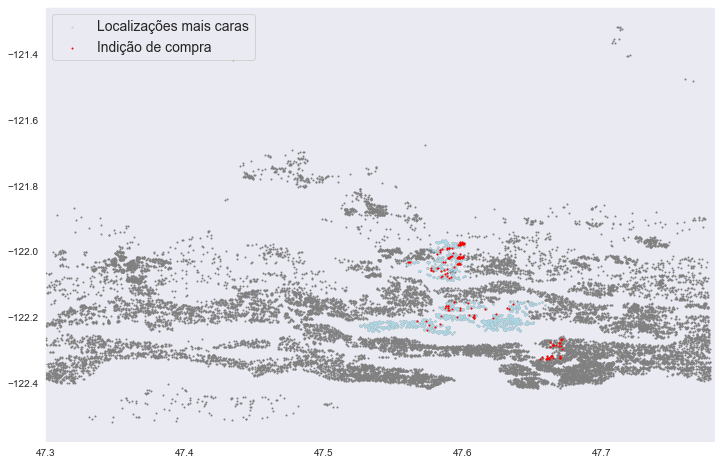

In [47]:
first_luxury = raw_data[(raw_data.zipcode == 98039 ) ]
second_luxury = raw_data[(raw_data.zipcode == 98040 ) ]
third_luxury = raw_data[(raw_data.zipcode == 98004 ) ]
fourth_luxury = raw_data[(raw_data.zipcode == 98075 ) ]
fifth_luxury = raw_data[(raw_data.zipcode == 98005 ) ]
plt.figure(figsize=(12,8))
plt.scatter(raw_data.lat , raw_data.long, color='grey', s=1)
plt.scatter(first_luxury.lat , first_luxury.long, color='lightblue', s=1)
plt.scatter(second_luxury.lat , second_luxury.long, color='lightblue', s=1)
plt.scatter(third_luxury.lat , third_luxury.long, color='lightblue', s=1)
plt.scatter(fourth_luxury.lat , fourth_luxury.long, color='lightblue', s=1)
plt.scatter(fifth_luxury.lat , fifth_luxury.long, color='lightblue', s=1, label='Localizações mais caras')
plt.scatter(houses_to_reform.lat , houses_to_reform.long, color='red', s=1, label='Indição de compra')
plt.legend(fontsize=14)
plt.xlim((47.3,47.781))
plt.show()

### 2.6 Reutilizando a separação de bairros da solução 1 conseguimos diminuir a área de busca a locais mais "confiáveis"

A diferença de preços não é tão alta quanto a que exploramos anteriormente, o que pode resultar em uma diminuição na obtenção de lucro por unidade. Trata-se de outra questão do negócio que não examinaremos aqui... vender poucas por muito ou muitas por pouco?

In [48]:
houses_to_reform2 = raw_data[(abs(raw_data.sqft_living-raw_data.sqft_living15)<200) & (raw_data.price < raw_data.price.mean())]
houses_to_reform2 = houses_to_reform2[(houses_to_reform2.condition < 5)]

houses_to_reform2 = houses_to_reform2[(houses_to_reform2.zipcode == 98007) | (houses_to_reform2.zipcode == 98074) | 
                              (houses_to_reform2.zipcode == 98077) | (houses_to_reform2.zipcode == 98177) | 
                              (houses_to_reform2.zipcode == 98011) | (houses_to_reform2.zipcode == 98052) |
                              (houses_to_reform2.zipcode == 98122) | (houses_to_reform2.zipcode == 98072) |
                              (houses_to_reform2.zipcode == 98059) | (houses_to_reform2.zipcode == 98028) |
                              (houses_to_reform2.zipcode == 98155)]
len(houses_to_reform2)

846

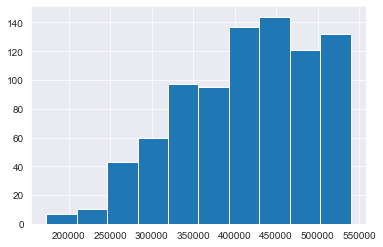

In [50]:
houses_to_reform2.price.hist()
plt.show()

Novamente, já que o design se mostra influenciando mais o preço, a próxima divisão será baseada nele. Comprando por nota de design mais baixas e aumentando o preço de venda ao alterá-lo na reforma.

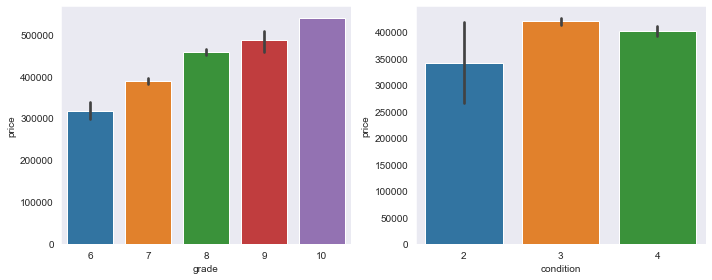

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.barplot(houses_to_reform2.grade, houses_to_reform2.price, ax=ax[0])
sns.barplot(houses_to_reform2.condition, houses_to_reform2.price, ax=ax[1])
fig.tight_layout()

In [52]:
houses_to_reform2 = houses_to_reform2[houses_to_reform2.grade < 8]
len(houses_to_reform2)

513

**Há uma diferença muito grande na quantidade de casas com designs 6 e 7. Mas a diferença entre os preços máximo e mínimo é pequena.**

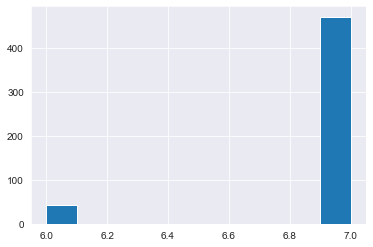

In [53]:
houses_to_reform2.grade.hist()
plt.show()

In [54]:
print(houses_to_reform2[houses_to_reform2.grade == 6].price.max() - houses_to_reform2[houses_to_reform2.grade == 7].price.min())
print(houses_to_reform2[houses_to_reform2.grade == 7].price.max() - houses_to_reform2[houses_to_reform2.grade == 7].price.min())

325000.0
349000.0


**Além disso, há mais casas com preços maiores para design de nota 7. Se bem que a quantidade de casas total para essa nota é quase 10 vezes maior que casas examinadas como 6. Para disfarçar essa discrepância, podemos multiplicar as quantias com nota 6 por 10 e fazer uma comparação melhor...**

In [55]:
print(len(houses_to_reform2[(houses_to_reform2.grade == 6) & (houses_to_reform2.price > 300000)]))
print(len(houses_to_reform2[(houses_to_reform2.grade == 7) & (houses_to_reform2.price > 300000)]))

24
410


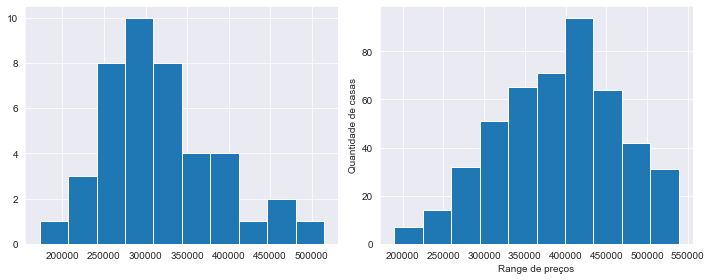

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
houses_to_reform2[houses_to_reform2.grade == 6].price.hist(ax=ax[0])
houses_to_reform2[houses_to_reform2.grade == 7].price.hist(ax=ax[1])
plt.xlabel('Range de preços'); plt.ylabel('Quantidade de casas')
fig.tight_layout()

In [57]:
print('Quantidade(real) de imóveis')
print(len(houses_to_reform2[(houses_to_reform2.grade == 6)]))
print(len(houses_to_reform2[(houses_to_reform2.grade == 7)]))
print('\nQuantidade de imóveis com preço > 300,000.00')
print(len(houses_to_reform2[(houses_to_reform2.grade == 6) & (houses_to_reform2.price > 300000)])*10)
print(len(houses_to_reform2[(houses_to_reform2.grade == 7) & (houses_to_reform2.price > 300000)]))
print('\nQuantidade de imóveis com preço < 300,000.00')
print(len(houses_to_reform2[(houses_to_reform2.grade == 6) & (houses_to_reform2.price < 300000)])*10)
print(len(houses_to_reform2[(houses_to_reform2.grade == 7) & (houses_to_reform2.price < 300000)]))

Quantidade(real) de imóveis
42
471

Quantidade de imóveis com preço > 300,000.00
240
410

Quantidade de imóveis com preço < 300,000.00
180
57


### 2.6.1 Solução (parte 3)
"Confirma-se" que a nota 7 contém mais imóveis mais caros e menos mais baratos. Ou seja, se forcarmos nossos esforços em moradias de nível 6 de design é mais próvavel de termos um lucro maior com reforma. Até porque após uma reforma essa nota pode se tornar até maior que 7. Em contra partida, devemos lembrar que na primeira divisão, os designs vão de 6 a 10. Portanto ao invés de segregarmos por ele novamente, basta nos guiarmos pelos preços mais baixos, tendo em vista que essas observações atendem aos outros atributos.

In [58]:
houses_to_reform_low_price = houses_to_reform2[(houses_to_reform2.price < 280000)]
len(houses_to_reform_low_price)
# houses_to_reform_low_price.to_csv("localizações "confiáveis" preços baixos (para reformar)", index=False)

51

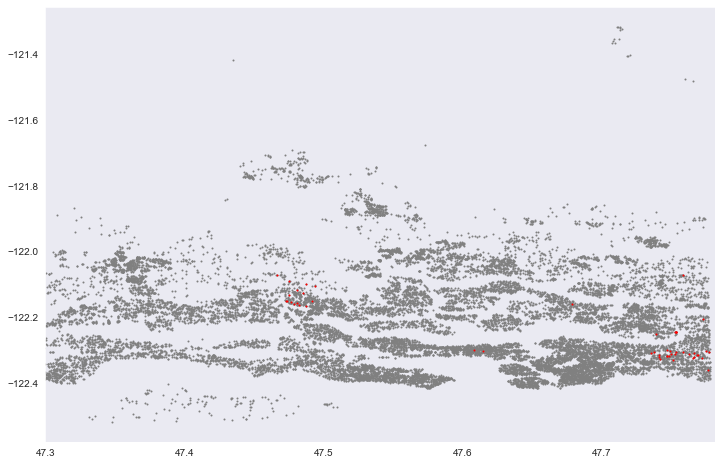

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(raw_data.lat , raw_data.long, color='grey', s=1)
plt.scatter(houses_to_reform_low_price.lat , houses_to_reform_low_price.long, color='red', s=1)
plt.xlim((47.3,47.781))
plt.show()

In [499]:
good_location.to_pickle('good_location.pkl')
good_prices.to_pickle('good_prices.pkl')
houses_to_reform.to_pickle('houses_to_reform.pkl')
houses_to_reform_low_price.to_pickle('houses_to_reform_low_price.pkl')

## 3 - A House Rocket deveria fazer uma reforma para aumentar o preço da venda?

O uso de machine learning com o intuito de estimar os preços das casas é um caminho a se seguir. Já que os dados já estão computáveis, criarei um modelo inicial para ver como ele se sai e como baseline utilizaremos a [mediana](https://www.answerminer.com/blog/mean-vs-median#:~:text=The%20Difference%20Between%20Mean%20and,in%20a%20list%20of%20numbers.&text=It%20is%20necessary%20to%20see,distort%20the%20results%20and%20visualizations.) dos preços.

A regressão linear apresentou resultados melhores que a baseline e a Decision Tree foi melhor que a regressão.

### Baseline vs Modelo inicial

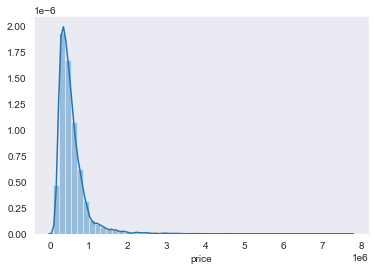

In [62]:
sns.distplot(raw_data.price)
plt.show()

In [63]:
baseline = np.full_like(raw_data.iloc[:, 0], raw_data['price'].median())

print("score: ", r2_score(raw_data.price, baseline).round(2))
print("RMeanSE: ", np.sqrt(mean_squared_error(raw_data.price, baseline)).round(2))
print("MeanAE: ", mean_absolute_error(raw_data.price, baseline).round(2))
print("MedianAE:", median_absolute_error(raw_data.price, baseline).round(2))
print("MaxError:", max_error(raw_data.price, baseline).round(2))

score:  -0.06
RMeanSE:  378010.6
MeanAE:  221816.48
MedianAE: 150000.0
MaxError: 7250000.0


**LinearRegression**

In [64]:
X = raw_data.drop(columns=['price','id','date']);     y = raw_data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("score: ", linear_model.score(X_test, y_test).round(2))

y_pred = linear_model.predict(X_test)
print("RMeanSE: ", np.sqrt(mean_squared_error(y_test,  y_pred)).round(2))
print('MeanAE: ', mean_absolute_error(y_test, y_pred).round(2))
print('MedianAE: ', median_absolute_error(y_test, y_pred).round(2))
print('MaxError: ', max_error(y_test, y_pred).round(2))

score:  0.7
RMeanSE:  212539.52
MeanAE:  127493.34
MedianAE:  87085.17
MaxError:  3236267.59


**DecisionTreeRegressor**

In [74]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size =.2, random_state=42)

Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_train2, y_train2)
print("score: ", Tree_model.score(X_test2, y_test2).round(2))

y_pred2 = Tree_model.predict(X_test2)
print("RMeanSE: ", np.sqrt(mean_squared_error(y_test2,  y_pred2)).round(2))
print('MeanAE: ', mean_absolute_error(y_test2, y_pred2).round(2))
print('MedianAE: ', median_absolute_error(y_test2, y_pred2).round(2))
print('MaxError: ', max_error(y_test2, y_pred2).round(2))

score:  0.71
RMeanSE:  208184.51
MeanAE:  104000.33
MedianAE:  55050.0
MaxError:  4605000.0


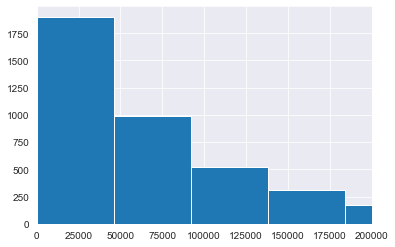

In [75]:
predictions = Tree_model.predict(X_test2)
absolute_errors = abs(y_test2 - predictions)
absolute_errors.hist(bins=100)
plt.xlim(0, 200000)
plt.show()

**48% das estimativas têm erro acima de 60 mil dólares.**

In [76]:
len(absolute_errors[absolute_errors >= 60000])/len(absolute_errors)

0.4804533888503354

Já que a DecisionTreeRegressor demonstrou melhores resultados, continuarei com ela por enquanto.

> Por conta dos testes (não todos estão aqui) estava reutilizando bastante esse trecho do código, então o transformarei em uma função.

In [6]:
def decision_tree_function(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state=42)

    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(X_train, y_train)

    y_pred = decision_tree.predict(X_test)
    print("score: ", r2_score(y_test, y_pred).round(2))
    print("RMeanSE: ", np.sqrt(mean_squared_error(y_test,  y_pred)).round(2))
    print('MeanAE: ', mean_absolute_error(y_test, y_pred).round(2))
    print('MedianAE: ', median_absolute_error(y_test, y_pred).round(2))
    print('MaxError: ', max_error(y_test, y_pred).round(2))
    
    # Erros acima de 60 mil dólares (%)
    predictions = decision_tree.predict(X_test)
    absolute_errors = abs(y_test - predictions)
    print(round(len(absolute_errors[absolute_errors >= 60000])/len(absolute_errors), 2), "de erro acima de 60 mil dólares")
    
    return decision_tree

### 3.1 Análise de dados

Buscar e retirar as observações irregularidades para manter o que é útil e facilita a aprendizagem do algoritmo.

    33 quartos? 0 quarto ou banheiro? Hummm
    
Com algumas modificações mais genéricas conseguimos diminuir a "porcentagem de erro" indesejável de 48 para 44%

In [3]:
data = raw_data.copy()
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Manter número de quartos e banheiros mais realistas.

Arredondar algumas colunas com decimais.

Limitar o "m²" para valores dentro do desvio padrão.

In [4]:
data = data[(data.bedrooms > 0) & (data.bedrooms < 10)]
data = data[data.bathrooms >= 1]

data.price = data.price.astype(int)
data.bathrooms = data.bathrooms.astype(int)
data.floors = data.floors.astype(int)

min_value = data.sqft_living.mean() - data.sqft_living.std()
max_value = data.sqft_living.mean() + data.sqft_living.std()
data = data[(data.sqft_living >= min_value) & (data.sqft_living <= max_value)]

In [9]:
X = data.drop(columns=['price','id','date']);    y = data['price']

decision_tree = decision_tree_function(X, y)

score:  0.65
RMeanSE:  129935.61
MeanAE:  82361.01
MedianAE:  50000.0
MaxError:  1050000.0
0.44 de erro acima de 60 mil dólares


### 3.2 Testando correlações
Podemos deixar de utilizar algumas colunas de acordo com o quão correlacionadas elas estão (informação redundante) e o quanto elas influenciam o preço.

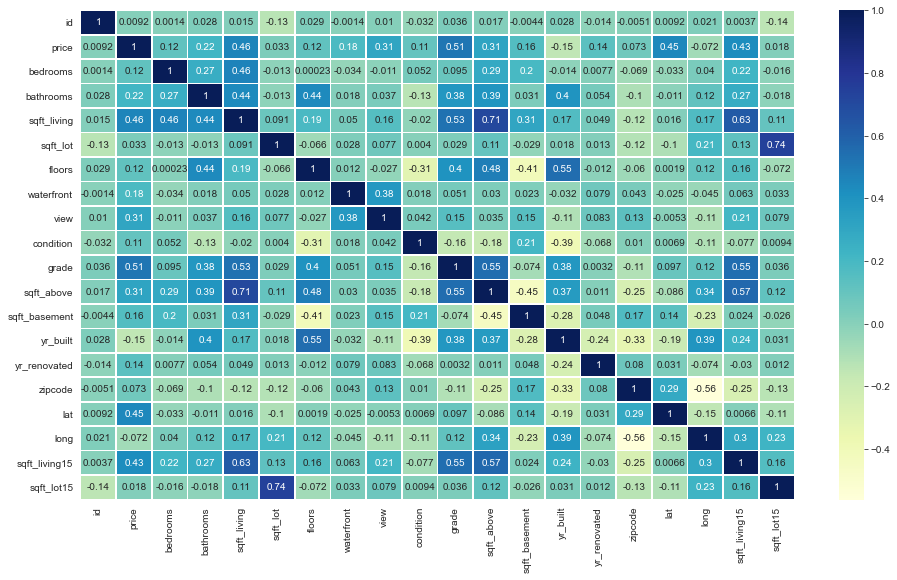

In [83]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidths=.6, cmap="YlGnBu")
plt.show()

In [84]:
for col in data.columns.drop('date'):
    for value, col_name in zip(data.corr()[col].values, data.corr()['bathrooms'].index):
        if ((value >= 0.7) or (value <= -0.7)) and (value != 1):   
            print(col)
            print(col_name, '--' ,value,'\n')

sqft_living
sqft_above -- 0.7098862502626087 

sqft_lot
sqft_lot15 -- 0.7399545446174816 

sqft_above
sqft_living -- 0.7098862502626087 

sqft_lot15
sqft_lot -- 0.7399545446174816 



In [85]:
for importance, column in zip(decision_tree.feature_importances_, X_train.columns):
    print(f'{(importance*100).round(3)}%   {column}')

0.462%   bedrooms
0.17%   bathrooms
18.19%   sqft_living
2.85%   sqft_lot
0.197%   floors
1.303%   waterfront
2.142%   view
0.67%   condition
7.344%   grade
2.105%   sqft_above
0.509%   sqft_basement
5.407%   yr_built
0.326%   yr_renovated
2.669%   zipcode
42.592%   lat
6.21%   long
4.752%   sqft_living15
2.103%   sqft_lot15


In [88]:
X = data.drop(columns=['price','id','date','sqft_above', 'sqft_lot15'])
y = data['price']

decision_tree_function(X, y)

score:  0.65
RMeanSE:  129979.64
MeanAE:  80808.57
MedianAE:  50000.0
MaxError:  1155000.0
0.43 de erro acima de 60 mil dólares


DecisionTreeRegressor()

### 3.3 Feature Engineering

Simplificando algumas variáveis ao criar uma coluna para a idade da casa ['house_age'] e outra ['renovated'] para saber se a casa foi reformada ou não (já que há muitíssimos zeros) na original. E assim, também devemos eliminar as colunas que as derivam por apresentarem alta correlação.

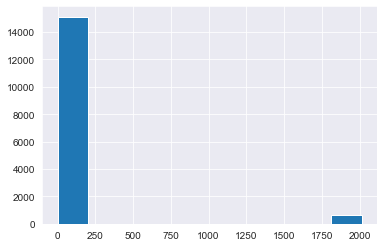

In [11]:
data.yr_renovated.hist()
plt.show()

In [12]:
data["house_age"] = data["date"].dt.year - data['yr_built']
data['renovated'] = data['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

In [21]:
X = data.drop(columns=['price','id','date','sqft_above', 'sqft_lot15', 'floors','yr_renovated','yr_built'])
y = data['price']

decision_tree_function(X, y)

score:  0.64
RMeanSE:  131500.1
MeanAE:  81807.47
MedianAE:  50050.0
MaxError:  1195200.0
0.44 de erro acima de 60 mil dólares


DecisionTreeRegressor()

Os resultados não variam tanto... após umas pesquisas decidi utilizar um novo Regressor que parece ser mais adequado.

Testando GradientBoostingRegressor()

E uau! Realmente foi efetivo.

In [22]:
X = data.drop(columns=['price','id','date','sqft_above', 'sqft_lot15', 'floors','yr_renovated','yr_built'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state=42)

# there's a need to standardise the training and test data before putting them through the GBR model.
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

gdb_model = GradientBoostingRegressor(random_state=42)  
gdb_model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
y_pred = gdb_model.predict(rescaled_X_test)

print("score: ", r2_score(y_test, y_pred).round(2))
print("RMeanSE: ", np.sqrt(mean_squared_error(y_test,  y_pred)).round(2))
print('MeanAE: ', mean_absolute_error(y_test, y_pred).round(2))
print('MedianAE: ', median_absolute_error(y_test, y_pred).round(2))
print('MaxError: ', max_error(y_test, y_pred).round(2))

absolute_errors = abs(y_test - y_pred)
print(round(len(absolute_errors[absolute_errors >= 60000])/len(absolute_errors), 2), "de erro acima de 60 mil dólares")

score:  0.81
RMeanSE:  95044.71
MeanAE:  62296.54
MedianAE:  41632.22
MaxError:  772162.75
0.35 de erro acima de 60 mil dólares


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state=42)

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

gdb_model = GradientBoostingRegressor(random_state=42, n_estimators=400)  # n_estimators
gdb_model.fit(rescaled_X_train, y_train)

rescaled_X_test = scaler.transform(X_test)
y_pred = gdb_model.predict(rescaled_X_test)

print("score: ", r2_score(y_test, y_pred).round(2))
print("RMeanSE: ", np.sqrt(mean_squared_error(y_test,  y_pred)).round(2))
print('MeanAE: ', mean_absolute_error(y_test, y_pred).round(2))
print('MedianAE: ', median_absolute_error(y_test, y_pred).round(2))
print('MaxError: ', max_error(y_test, y_pred).round(2))

absolute_errors = abs(y_test - y_pred)
print(round(len(absolute_errors[absolute_errors >= 60000])/len(absolute_errors), 2), "de erro acima de 60 mil dólares")

score:  0.84
RMeanSE:  86654.29
MeanAE:  55731.49
MedianAE:  35811.87
MaxError:  843267.62
0.3 de erro acima de 60 mil dólares


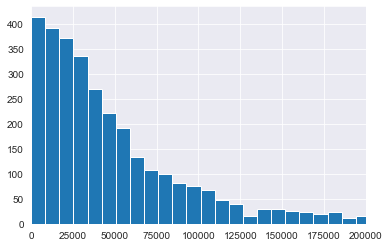

In [24]:
absolute_errors.hist(bins=100)
plt.xlim(0, 200000)
plt.show()

In [164]:
for predictions in range(5):
    predicted_sample = X_test.sample()
    rescaled_X_test = scaler.transform(predicted_sample)
    y_pred = gdb_model.predict(rescaled_X_test)
    y_index = predicted_sample.index[0]

    print("\nPreço Real: ", y_test[y_index])
    print("Estimativa: ", int(y_pred[0]))
    print("Diferença:  ", y_test[y_index] - int(y_pred[0]))


Preço Real:  625000
Estimativa:  621954
Diferença:   3046

Preço Real:  471000
Estimativa:  503392
Diferença:   -32392

Preço Real:  566000
Estimativa:  677605
Diferença:   -111605

Preço Real:  265000
Estimativa:  239035
Diferença:   25965

Preço Real:  540000
Estimativa:  568243
Diferença:   -28243


## 3.4 Solução
A série de gráficos a seguir nos mostra a diferença que cada variável traz de retorno em caso de reforma.

### A House Rocket deveria fazer uma reforma para aumentar o preço da venda?

Sim! Logo no primeiro gráfico, percebemos que o simples fato da casa ter sido reformada aumenta seu valor de venda. Entretanto, há alguns pontos que devemos nos atentar, vamos às explicações.

> **Ponto de Partida.**
>
> _Com o modelo pronto pra uso, escrevi um algoritmo para estimar os preços das casas, e nos mostrar a diferença entre o valor real e a predição._
>
> _Ele também incorpora mudanças nos valores de uma das variáveis e refaz a estimação._
>
> _Desse modo, é possível ter uma ideia de quão próximo ele estimou o preço da casa e tomar o valor estimado como base para os testes._
>
> ---
>
> **Os testes.**
> 
> _Vamos considerar apenas as variáveis que podemos alterar, não há como mover a moradia de lugar, por exemplo (lat, long), mas seria possível construir mais 1 quarto, banheiro ou mudar o design do imóvel._
>
> _Assim, adicionei aos valores já existentes 1 ou 2 unidades, para que o modelo estimasse um novo valor, já que ao tirar a diferença saberemos quanto 1 ou 2 (quartos) a mais eleva o preço do imóvel._

        Logo abaixo, na amostra do index 8534, notamos que uma casa de ['grade'] 7 custa 898.000 mil e o modelo
        definiu seu preço como sendo 787.969. Ao elevar o valor da feature ['grade'] para 8, ele nos diz que seu
        preço deve ser 806.879. Em outras palavras, uma reforma que atue nessa característica dessa casa em 
        particular, nos traria um ganho de 18.909 no preço do imóvel. Porém, caso ['grade'] se transformasse em 
        9 ao invés do inicial 8, o retorno seria de 139.410 (isso por, como já analisamos, ['grade'] influenciar
        bastante o preço). Por outro lado, ainda não estamos considerando o custo da reforma.

> _Esse é um exemplo bem particular, mas apliquei o mesmo processo para as outras colunas, várias vezes enquanto salvava os resultados para visualizá-los nos gráficos._
>
> ---
>
> **Casas recomendadas.**
>
> Em seguida utilizarei esse mesmo processo nas casas que encontramos como sendo solução do primeiro problema de negócio.
>
> E também, considerando múltliplas mudanças, visto que a parte inicial foi pensada para nos dar uma noção, ocorrendo "individualmente".
>
>
>

In [25]:
def display_results(y_test, y_pred, y_index):
    print("Estimativa: ", int(y_pred[0]))
    print('Diferença:  ', y_test[y_index] - int(y_pred[0]) )   

def predict_price(predicted_sample):
    rescaled_X_test = scaler.transform(predicted_sample)
    y_pred = gdb_model.predict(rescaled_X_test)
    y_index = predicted_sample.index[0]
    return y_pred, y_index

In [398]:
sampling = X_test.sample()
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','view','condition','grade','sqft_living15','renovated']

predicted_sample = sampling.copy()
y_pred, y_index = predict_price(predicted_sample)
display(predicted_sample[columns])
print("\nPreço Real: ", y_test[y_index])  
display_results(y_test, y_pred, y_index)   
print('-'*81)

predicted_prices = [y_pred[0]]

for samples in range(2):      
    predicted_sample.grade += 1
    y_pred, y_index = predict_price(predicted_sample)

    display(predicted_sample[columns])
    display_results(y_test, y_pred, y_index)
    
    predicted_prices.append(y_pred[0])
    
    if samples > 0:
        print('\nGanho de 1 nível: ', int(predicted_prices[1] - predicted_prices[0]))
        print('Ganho de 2 níveis: ', int(predicted_prices[2] - predicted_prices[0]))

,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_living15,renovated
8534,2,1,1490,9874,0,4,7,2280,0



Preço Real:  898000
Estimativa:  787969
Diferença:   110031
---------------------------------------------------------------------------------


,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_living15,renovated
8534,2,1,1490,9874,0,4,8,2280,0


Estimativa:  806879
Diferença:   91121


,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_living15,renovated
8534,2,1,1490,9874,0,4,9,2280,0


Estimativa:  927380
Diferença:   -29380

Ganho de 1 nível:  18909
Ganho de 2 níveis:  139410


Função para os gráficos.

In [57]:
def plot_gains(gains_level_1, gains_level_2, name):
    plt.figure(figsize=(14,5))
    print('MUDANÇAS APLICADAS EM [', name,']')

    plt.subplot(1, 2, 1)
    gains1 = pd.Series(gains_level_1)
    gains1.hist() 
    plt.title('Melhora de 1 nível')
    plt.ylabel('Quantidade')

    plt.subplot(1, 2, 2)
    gains2 = pd.Series(gains_level_2)
    gains2.hist() 
    
    plt.title('Melhora de 2 níveis')
    plt.ylabel('Quantidade')

    plt.show()

In [494]:
gains_level_1 = []
gains_level_2 = []

for number_x in range(2500):  
    predicted_sample = X_test.sample().copy()
    y_pred, y_index = predict_price(predicted_sample)
    predicted_prices = [y_pred[0]]

    for samples in range(2):            
        # predicted_sample.renovated = 1
        # predicted_sample.bedrooms += 1
        # predicted_sample.bathrooms += 1
        # predicted_sample.view += 1
        # predicted_sample.condition += 1 
        '''if (predicted_sample.sqft_lot.values > predicted_sample.sqft_living.values):
            remaining_sqft = predicted_sample.sqft_lot - predicted_sample.sqft_living
            predicted_sample.sqft_living += (remaining_sqft/2)'''
        predicted_sample.grade += 1
        
        y_pred, y_index = predict_price(predicted_sample)

        predicted_prices.append(y_pred[0])

        if samples > 0:
            gains_level_1.append(int(predicted_prices[1] - predicted_prices[0]))
            gains_level_2.append(int(predicted_prices[2] - predicted_prices[0]))

print('Processo Finalizado!')

Processo Finalizado!


**Em resumo, o modelo  ("matemáticamente") identificou que algumas variáveis tendem a diminuir o preço, enquanto outras a aumentar. Logo, encontramos situações em que a criação de mais um quarto ou banheiro, na verdade, seria ruim, resultando em perda do valor de venda. Para "disfarçar" isso, as vizualizações brancas foram feitas em cima dos valores absolutos (transformando os negativos em positivos) apenas para nos dar uma noção em relação ao aumento proporcionado por aquela alteração.**


As reformadas, em geral aumentam os preços e é bem provável que os resultados negativos (diminuíção de preço após reforma) sejam de observações que já tinham ['renovated'] com valor 1 (reformada), e o modelo simplesmente estimou o preço acima da respota real (resultando em diferença negativa).

MUDANÇAS APLICADAS EM [ renovated ]


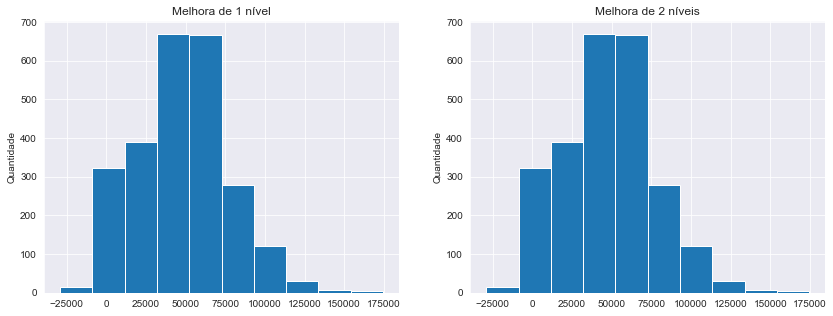

In [492]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'renovated')

MUDANÇAS APLICADAS EM [ renovated ]


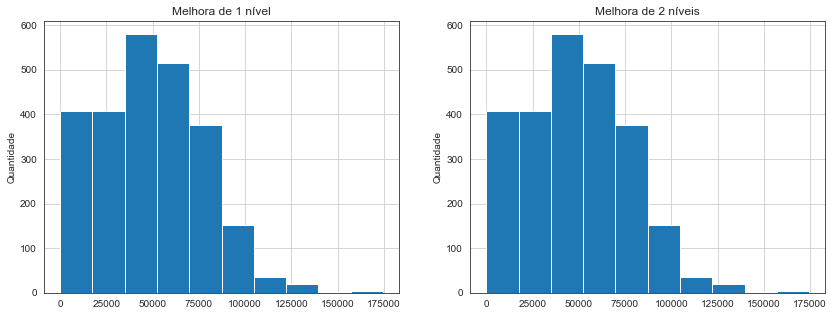

In [493]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'renovated')

Os quartos e banheiros são um pouco travessos, eles parecem não influenciar tanto nos preços e, na verdade, até influenciar negativamente. 

MUDANÇAS APLICADAS EM [ bedrooms ]


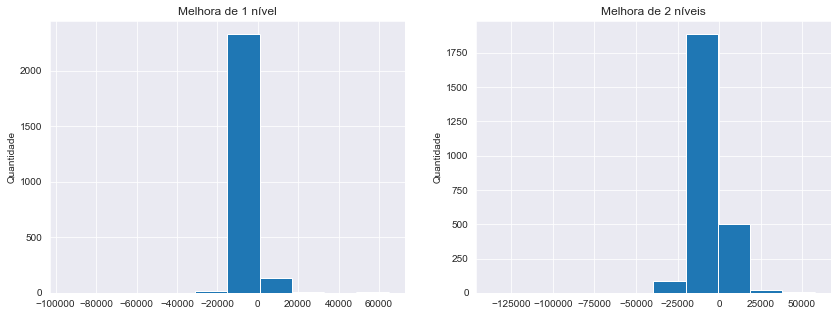

In [489]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'bedrooms')

MUDANÇAS APLICADAS EM [ bedrooms ]


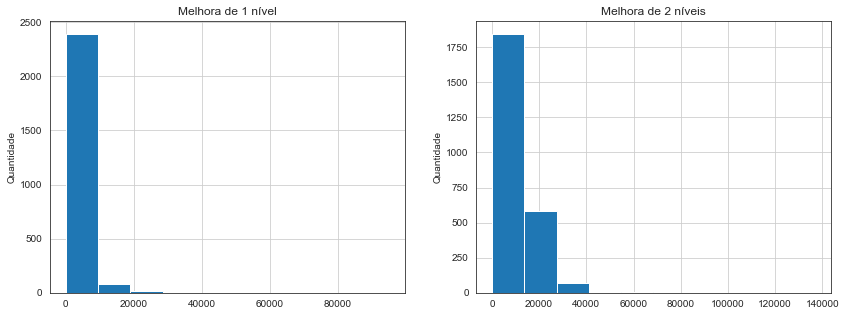

In [490]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'bedrooms')

MUDANÇAS APLICADAS EM [ bathrooms ]


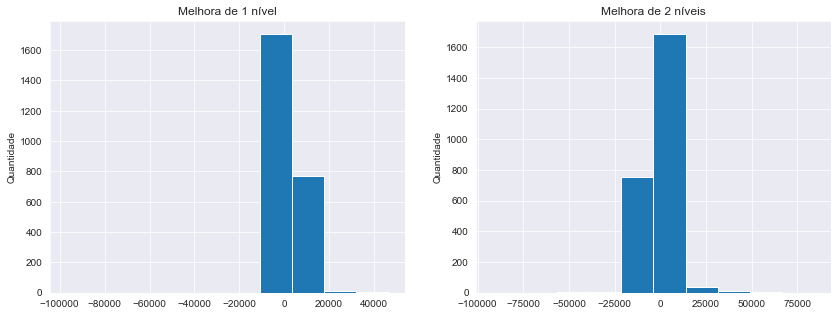

In [486]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'bathrooms')

MUDANÇAS APLICADAS EM [ bathrooms ]


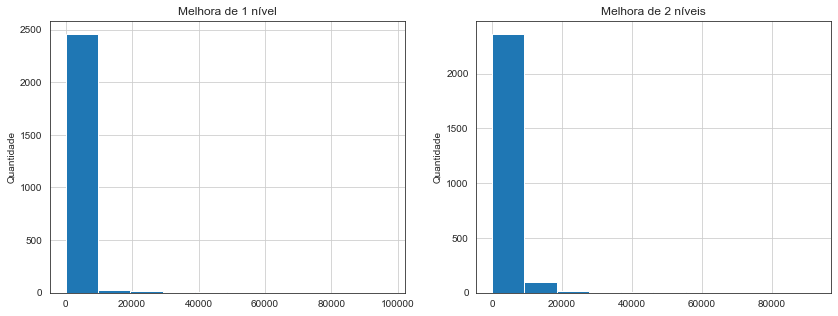

In [487]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'bathrooms')

MUDANÇAS APLICADAS EM [ view ]


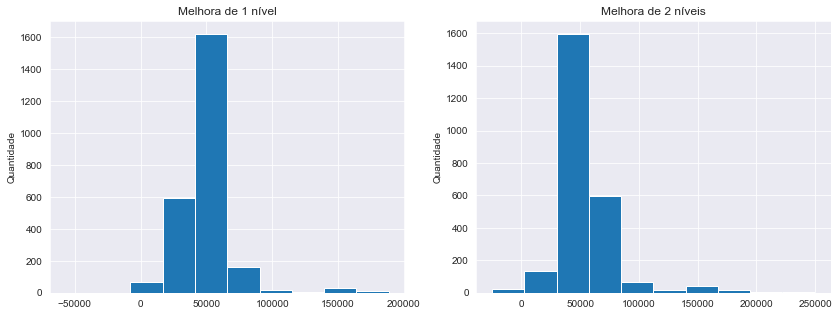

In [483]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'view')

MUDANÇAS APLICADAS EM [ view ]


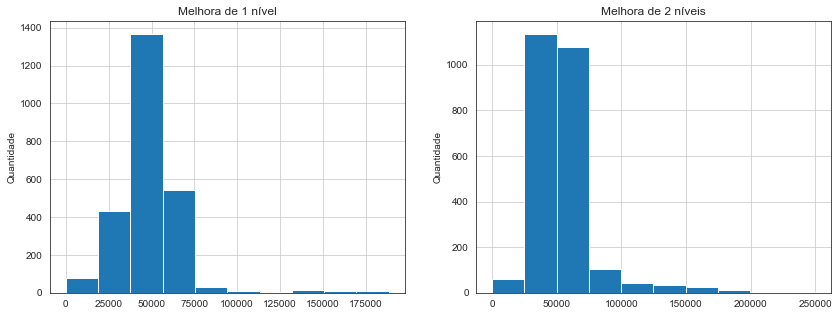

In [484]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'view')

MUDANÇAS APLICADAS EM [ condition ]


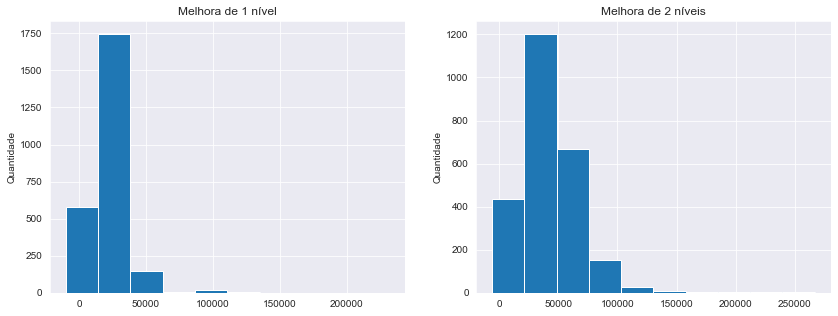

In [464]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'condition')

MUDANÇAS APLICADAS EM [ condition ]


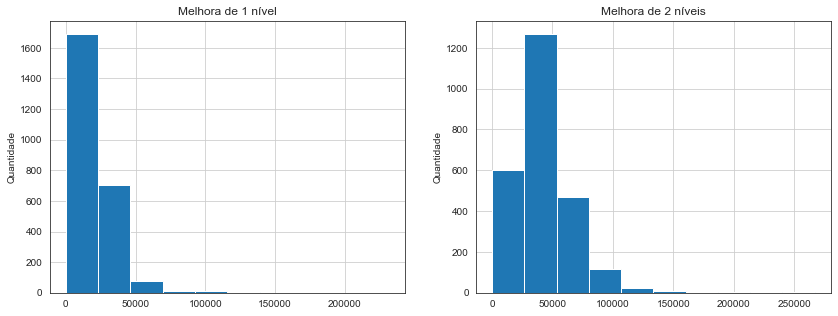

In [472]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'condition')

Para o "m²" delimitei um espaço útil de construção, subtraindo o sqft_living do sqft_lot e dividindo o resultado pela metade (para não criar um cômodo tão grande).
    
Não passei para o modelo qual cômodo seria construído (assim, ele poderia nos retornar um valor menos fictício) e para fins de simplicidade, descontinuei a exploração desse atributo.

MUDANÇAS APLICADAS EM [ sqft_living ]


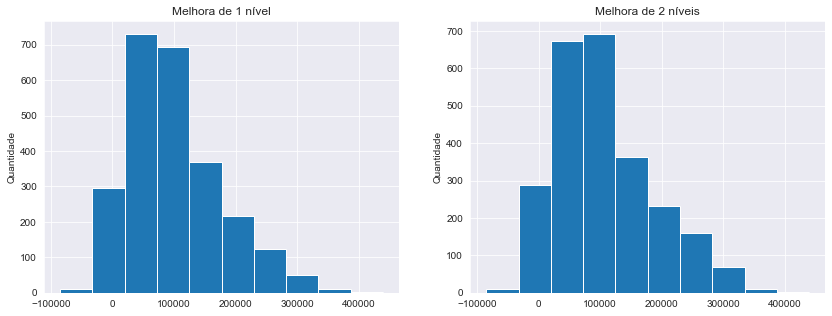

In [475]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'sqft_living')

MUDANÇAS APLICADAS EM [ sqft_living ]


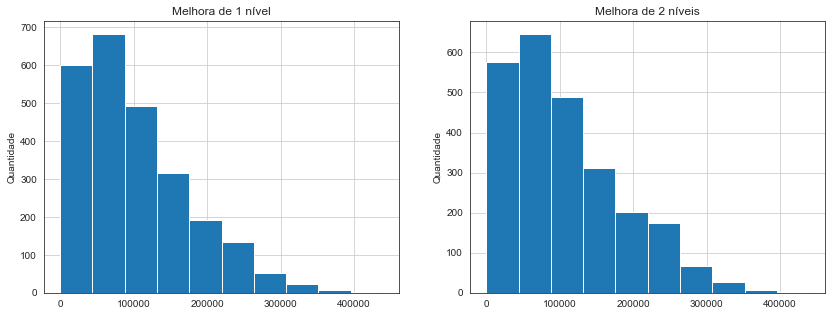

In [476]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'sqft_living')

MUDANÇAS APLICADAS EM [ grade ]


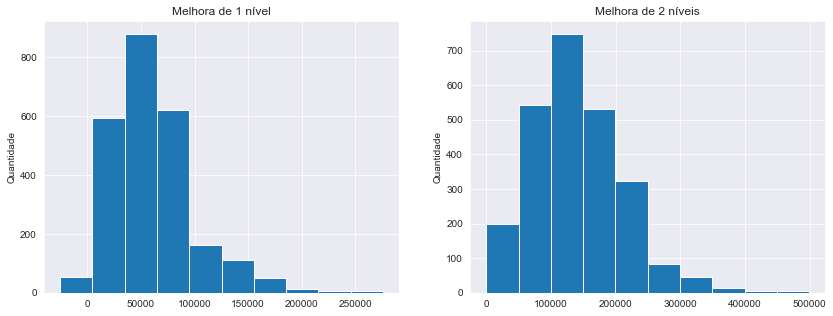

In [478]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'grade')

MUDANÇAS APLICADAS EM [ grade ]


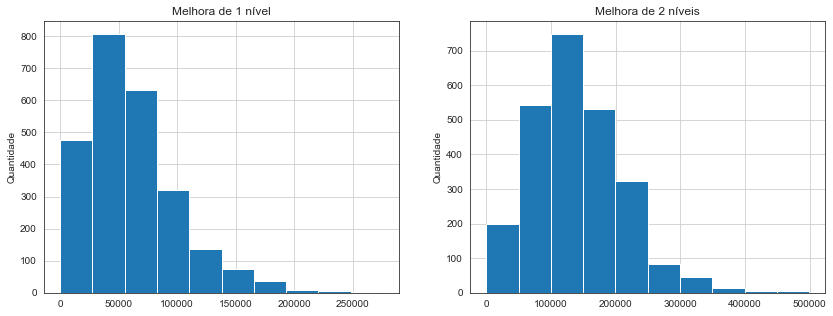

In [479]:
gains_level_1 = np.abs(gains_level_1)
gains_level_2 = np.abs(gains_level_2)
sns.set_style('white')
plot_gains(gains_level_1, gains_level_2, 'grade')

## 4 -  Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?
Uma resposta rápida é utilizarmos a importância das features modificáveis como fator solução. Assim sendo, as features que mais impactam o valor da casa deve ser aquela que devemos focar.

Nesse caso, as maiores influências que podemos alterar são:

        14.1 sqft_living (criação de um novo cômodo)
        13.9 grade
        3.72 view
        0.73 condition 
        0.29 renovated
        0.15 bedrooms
        0.07 bathrooms
        
Entretanto, algumas reformas podem ocorrer não apenas isoladamente, mas em um certo conjunto alterando mais de uma característica da casa. E para estudar as mudanças, os testes serão feitos com as casas que acreditamos serem as melhores para compra e venda.

In [27]:
for importance, column in zip(gdb_model.feature_importances_, X_test.columns):
    print( (importance*100).round(2) , column)

0.15 bedrooms
0.07 bathrooms
14.1 sqft_living
1.51 sqft_lot
1.56 waterfront
3.72 view
0.73 condition
13.9 grade
0.51 sqft_basement
3.25 zipcode
44.73 lat
3.65 long
5.5 sqft_living15
6.32 house_age
0.29 renovated


###  4.1 Testando nas casas recomendadas.

good_location -> 34 casas que não necessitam de reforma, estão localizadas em bairros que (teoricamente) tendem a valorizar no decorrer do tempo.

good_prices -> 62 casas que também não necessitam de reforma e que podem valorizar.

houses_to_reform -> 156 casas em  boas localizações (para reformar).

houses_to_reform_low_price -> 51 casas em localizações confiáveis e de preços baixos (para reformar).

> Devemos primeiro, modificar os dados para o formato utilizado.

In [115]:
good_location = pd.read_pickle("good_location.pkl")
good_prices = pd.read_pickle("good_prices.pkl")
houses_to_reform = pd.read_pickle("houses_to_reform.pkl")
houses_to_reform_low_price = pd.read_pickle("houses_to_reform_low_price.pkl")

In [116]:
recommended_houses = pd.concat([good_location, good_prices, houses_to_reform, houses_to_reform_low_price], axis=0)
recommended_houses["house_age"] = recommended_houses["date"].dt.year - recommended_houses['yr_built']
recommended_houses['renovated'] = recommended_houses['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

recommended_houses['price'] = recommended_houses.price.astype(int)
recommended_houses['bathrooms'] = recommended_houses.bathrooms.astype(int)

In [117]:
cols = X_test.columns
data = recommended_houses[cols]
prices = recommended_houses['price']

**Primeiramente, farei novamente a análise individual e em seguida alterando mais de uma variável por vez.** Reutilizando a segunda célula subsequente.

In [190]:
def predict_gains(predicted_sample):
    y_pred, y_index = predict_price(predicted_sample)

    predicted_prices.append(y_pred[0])

    if samples > 0:
        gains_level_1.append(int(predicted_prices[1] - predicted_prices[0]))
        gains_level_2.append(int(predicted_prices[2] - predicted_prices[0]))
        
def show_gains_details(gains_level_1, gains_level_2):
    gains1 = pd.Series(gains_level_1)
    gains2 = pd.Series(gains_level_2) 
    
    print("\tgains_level_1:\n")
    mean1 = round(np.mean(gains1))
    median1 = round(np.median(gains1))
    std1 = round(np.std(gains1))
    
    print("Mean:  ", mean1)
    print("Median:", median1)
    print("St Deviation:", std1)
    print(f"Faixa de ganho mediano: entre [{median1-std1}] e [{median1+std1}]")
    
    print("\n\n\tgains_level_2:\n")
    mean2 = round(np.mean(gains2))
    median2 = round(np.median(gains2))
    std2 = round(np.std(gains2))
    
    print("Mean:  ", mean2)
    print("Median:", median2)
    print("St Deviation:", std2)
    print(f"Faixa de ganho mediano: entre [{median2-std2}] e [{median2+std2}]")

In [196]:
gains_level_1 = []
gains_level_2 = []

for number_x in range(data.shape[0]):  
    predicted_sample = data.sample().copy()
    y_pred, y_index = predict_price(predicted_sample)
    predicted_prices = [y_pred[0]]

    for samples in range(2):            

        ''' --- CONDIÇÕES --- '''
        #predicted_sample.renovated = 1
        #predicted_sample.view += 1
        #predicted_sample.condition += 1      
        #predicted_sample.grade += 1
        ''' ----------------- '''
        
        predict_gains(predicted_sample)
        
print('Processo Finalizado!')

Processo Finalizado!


### 4.2 Mudanças 
ps: as condições foram alteradas e anotarei as alterações nos casos múltiplos.
### 4.2.1 Isoladas

MUDANÇAS APLICADAS EM [ renovated ]


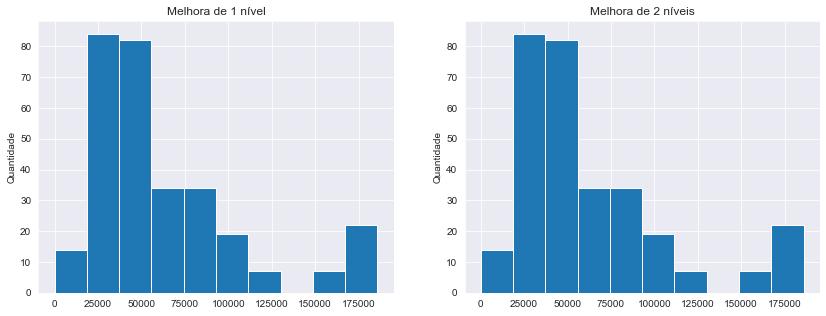

	gains_level_1:

Mean:   63671
Median: 45322.0
St Deviation: 44968
Faixa de ganho mediano: entre [354.0] e [90290.0]


	gains_level_2:

Mean:   63671
Median: 45322.0
St Deviation: 44968
Faixa de ganho mediano: entre [354.0] e [90290.0]


In [191]:
sns.set_style('darkgrid')
plot_gains(gains_level_1, gains_level_2, 'renovated')
show_gains_details(gains_level_1, gains_level_2)

MUDANÇAS APLICADAS EM [ view ]


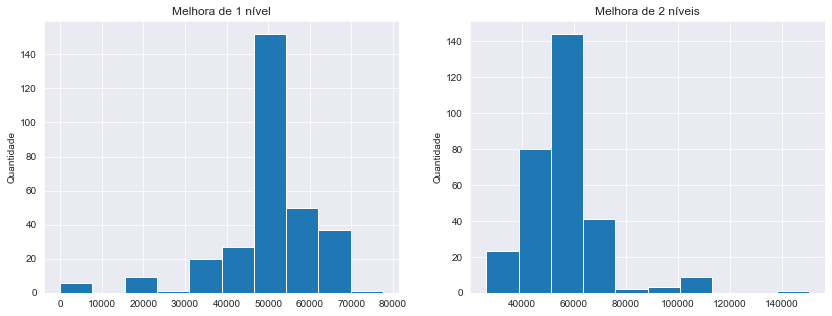

	gains_level_1:

Mean:   50300
Median: 52674.0
St Deviation: 11645
Faixa de ganho mediano: entre [41029.0] e [64319.0]


	gains_level_2:

Mean:   55199
Median: 52674.0
St Deviation: 14638
Faixa de ganho mediano: entre [38036.0] e [67312.0]


In [193]:
plot_gains(gains_level_1, gains_level_2, 'view')
show_gains_details(gains_level_1, gains_level_2)

MUDANÇAS APLICADAS EM [ condition ]


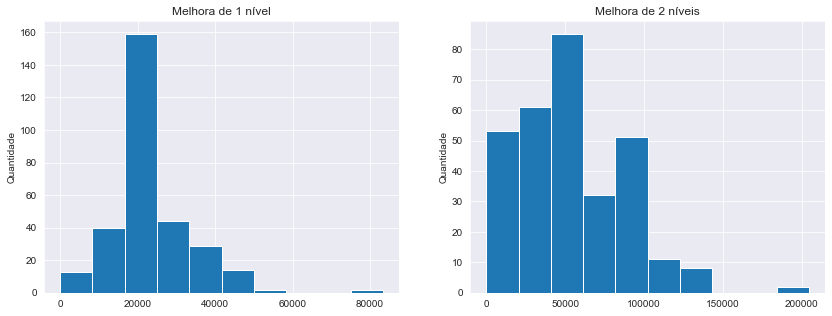

	gains_level_1:

Mean:   23236
Median: 20006.0
St Deviation: 10540
Faixa de ganho mediano: entre [9466.0] e [30546.0]


	gains_level_2:

Mean:   54695
Median: 49176.0
St Deviation: 32305
Faixa de ganho mediano: entre [16871.0] e [81481.0]


In [195]:
plot_gains(gains_level_1, gains_level_2, 'condition')
show_gains_details(gains_level_1, gains_level_2)

MUDANÇAS APLICADAS EM [ grade ]


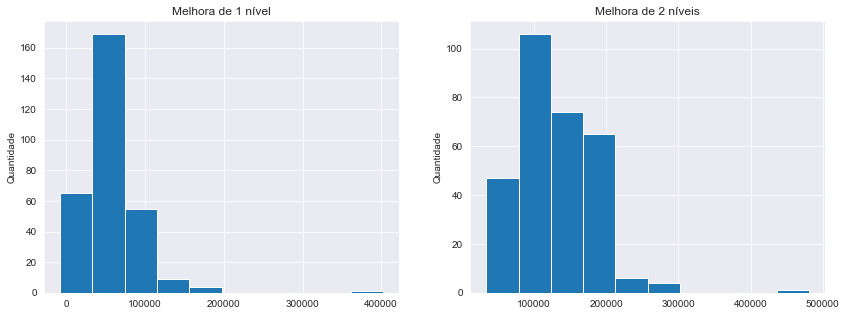

	gains_level_1:

Mean:   55962
Median: 52189.0
St Deviation: 36395
Faixa de ganho mediano: entre [15794.0] e [88584.0]


	gains_level_2:

Mean:   131002
Median: 122855.0
St Deviation: 51973
Faixa de ganho mediano: entre [70882.0] e [174828.0]


In [197]:
plot_gains(gains_level_1, gains_level_2, 'grade')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.2 renovated e condition
    
    Condições

> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1 

MUDANÇAS APLICADAS EM [ renovated e condition ]


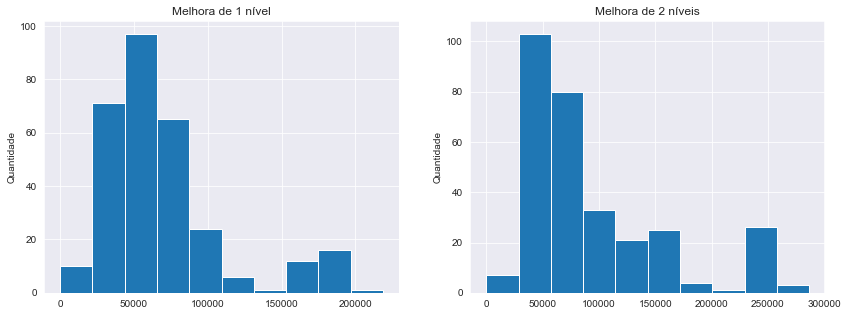

	gains_level_1:

Mean:   69453
Median: 55814.0
St Deviation: 42679
Faixa de ganho mediano: entre [13135.0] e [98493.0]


	gains_level_2:

Mean:   94456
Median: 69287.0
St Deviation: 61854
Faixa de ganho mediano: entre [7433.0] e [131141.0]


In [199]:
plot_gains(gains_level_1, gains_level_2, 'renovated e condition')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.3 renovated, condition e grade
    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1  
>
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ renovated, condition e grade ]


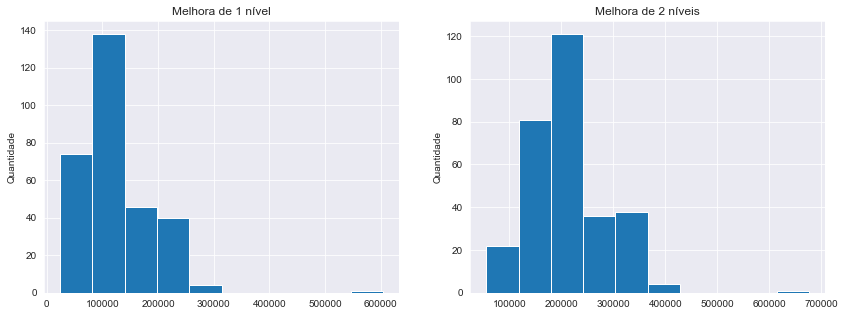

	gains_level_1:

Mean:   128035
Median: 119526.0
St Deviation: 62335
Faixa de ganho mediano: entre [57191.0] e [181861.0]


	gains_level_2:

Mean:   212027
Median: 201132.0
St Deviation: 76799
Faixa de ganho mediano: entre [124333.0] e [277931.0]


In [252]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition e grade')
show_gains_details(gains_level_1, gains_level_2)

    Condições
> predicted_sample.renovated = 1
>
> if samples == 0: predicted_sample.condition += 1      
>        
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ renovated, condition e grade ]


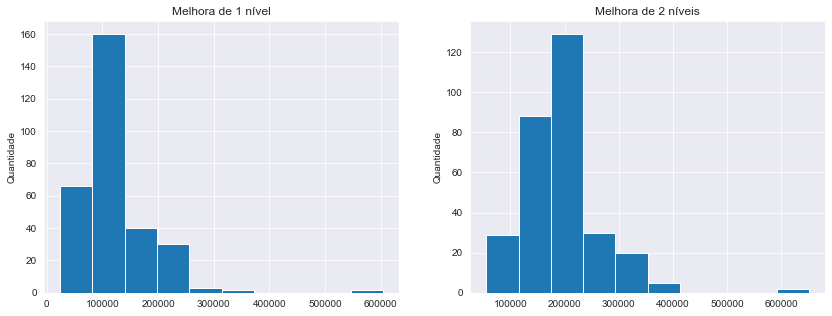

	gains_level_1:

Mean:   127147
Median: 116456.0
St Deviation: 66276
Faixa de ganho mediano: entre [50180.0] e [182732.0]


	gains_level_2:

Mean:   194662
Median: 185047.0
St Deviation: 72109
Faixa de ganho mediano: entre [112938.0] e [257156.0]


In [254]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition e grade')
show_gains_details(gains_level_1, gains_level_2)

    Condições
> predicted_sample.renovated = 1
>
> if samples == 0: predicted_sample.grade += 1
>        
> predicted_sample.condition += 1      

MUDANÇAS APLICADAS EM [ renovated, condition e grade ]


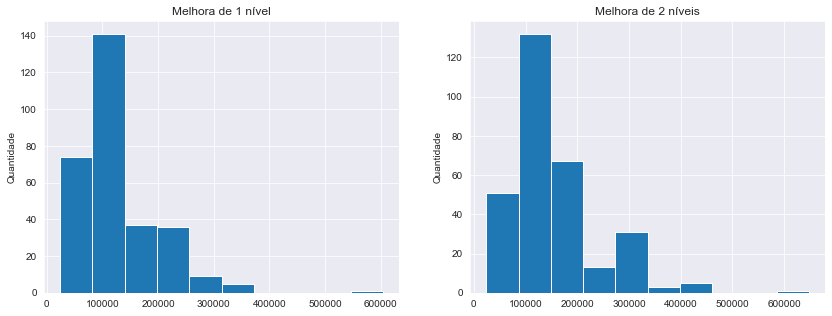

	gains_level_1:

Mean:   129555
Median: 116116.0
St Deviation: 70158
Faixa de ganho mediano: entre [45958.0] e [186274.0]


	gains_level_2:

Mean:   152531
Median: 133271.0
St Deviation: 85041
Faixa de ganho mediano: entre [48230.0] e [218312.0]


In [256]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition e grade')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.4 renovated, condition, grade e view
    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1
>
> predicted_sample.grade += 1
>
> predicted_sample.view += 1              

MUDANÇAS APLICADAS EM [ renovated, condition, grade e view ]


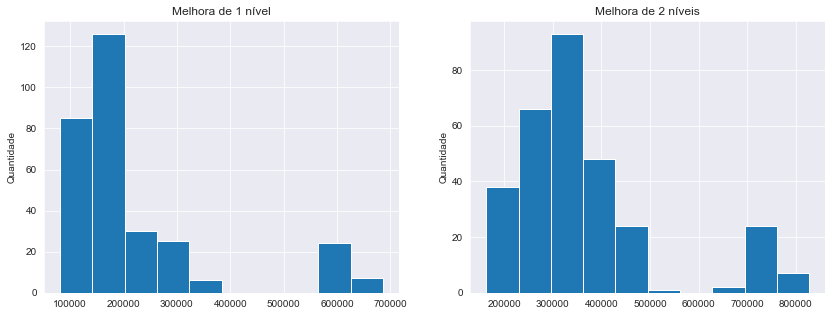

	gains_level_1:

Mean:   220776
Median: 168141.0
St Deviation: 145767
Faixa de ganho mediano: entre [22374.0] e [313908.0]


	gains_level_2:

Mean:   364700
Median: 338917.0
St Deviation: 147638
Faixa de ganho mediano: entre [191279.0] e [486555.0]


In [208]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition, grade e view')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> if samples == 0: predicted_sample.condition += 1
>
> predicted_sample.grade += 1
>
> predicted_sample.view += 1   

MUDANÇAS APLICADAS EM [ renovated, condition, grade e view ]


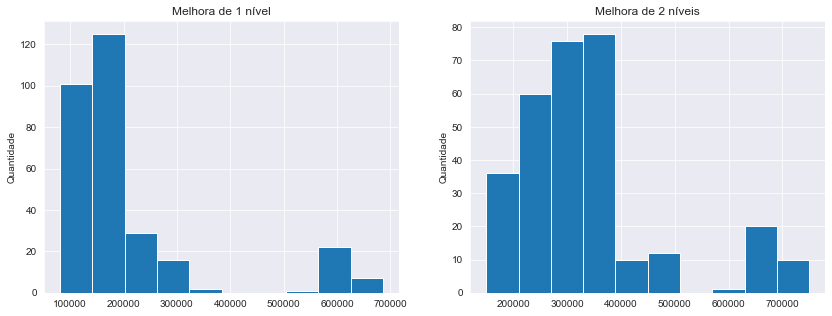

	gains_level_1:

Mean:   211440
Median: 165200.0
St Deviation: 144228
Faixa de ganho mediano: entre [20972.0] e [309428.0]


	gains_level_2:

Mean:   343355
Median: 320887.0
St Deviation: 136848
Faixa de ganho mediano: entre [184039.0] e [457735.0]


In [210]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition, grade e view')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1
>
> if samples == 0: predicted_sample.grade += 1
>
> predicted_sample.view += 1   

MUDANÇAS APLICADAS EM [ renovated, condition, grade e view ]


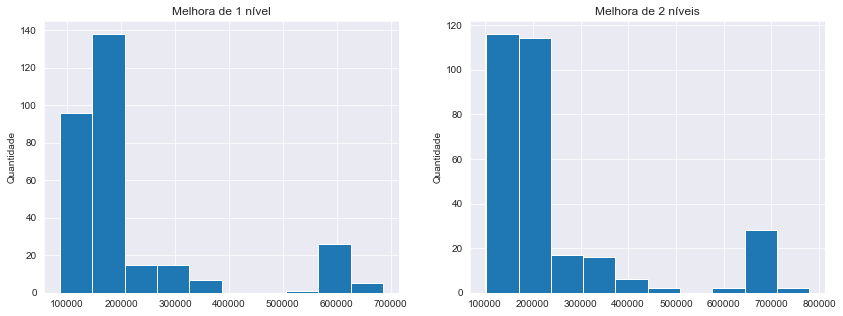

	gains_level_1:

Mean:   216514
Median: 164365.0
St Deviation: 146432
Faixa de ganho mediano: entre [17933.0] e [310797.0]


	gains_level_2:

Mean:   244377
Median: 186965.0
St Deviation: 160986
Faixa de ganho mediano: entre [25979.0] e [347951.0]


In [212]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition, grade e view')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1
>
> predicted_sample.grade += 1
>
> if samples == 0: predicted_sample.view += 1   

MUDANÇAS APLICADAS EM [ renovated, condition, grade e view ]


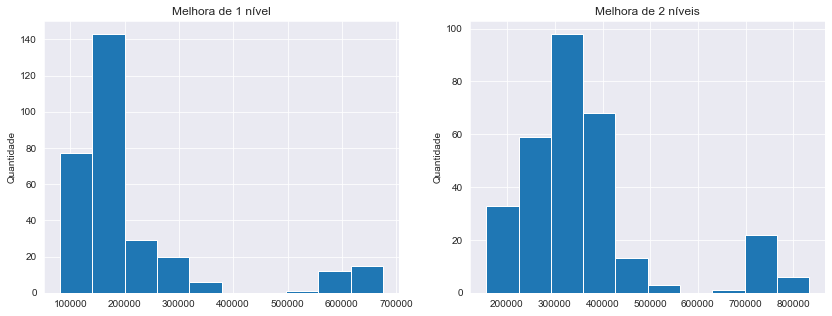

	gains_level_1:

Mean:   213237
Median: 167134.0
St Deviation: 137274
Faixa de ganho mediano: entre [29860.0] e [304408.0]


	gains_level_2:

Mean:   358771
Median: 337846.0
St Deviation: 139143
Faixa de ganho mediano: entre [198703.0] e [476989.0]


In [214]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition, grade e view')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.5 renovated, condition e view
    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1
>
> predicted_sample.view += 1

MUDANÇAS APLICADAS EM [ renovated, condition e view ]


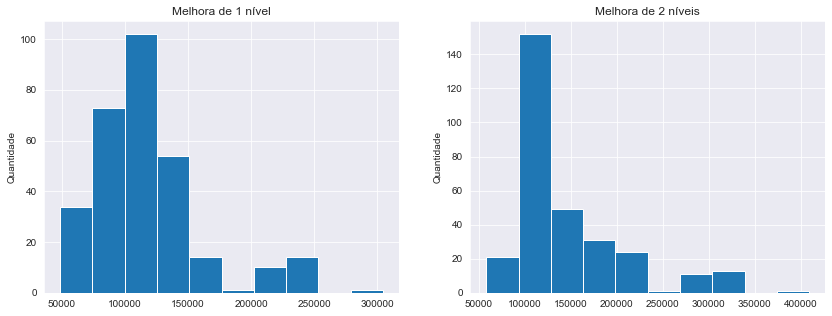

	gains_level_1:

Mean:   116952
Median: 109351.0
St Deviation: 42794
Faixa de ganho mediano: entre [66557.0] e [152145.0]


	gains_level_2:

Mean:   144941
Median: 120937.0
St Deviation: 59731
Faixa de ganho mediano: entre [61206.0] e [180668.0]


In [259]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition e view')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> if samples == 0: predicted_sample.condition += 1
>
> predicted_sample.view += 1        


MUDANÇAS APLICADAS EM [ renovated, condition e view ]


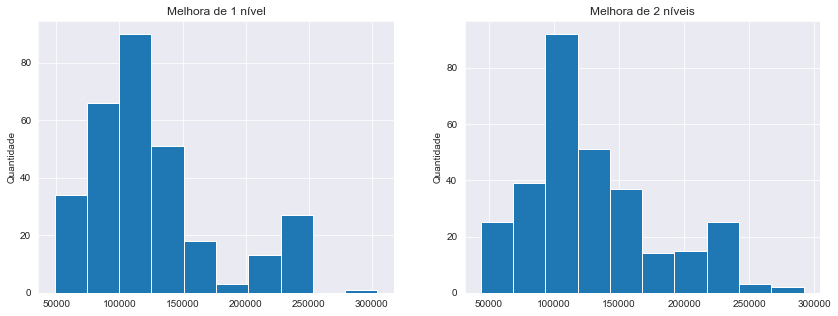

	gains_level_1:

Mean:   125296
Median: 111420.0
St Deviation: 51211
Faixa de ganho mediano: entre [60209.0] e [162631.0]


	gains_level_2:

Mean:   130807
Median: 117335.0
St Deviation: 50607
Faixa de ganho mediano: entre [66728.0] e [167942.0]


In [261]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition e view')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.condition += 1
>
> if samples == 0: predicted_sample.view += 1

MUDANÇAS APLICADAS EM [ renovated, condition e view ]


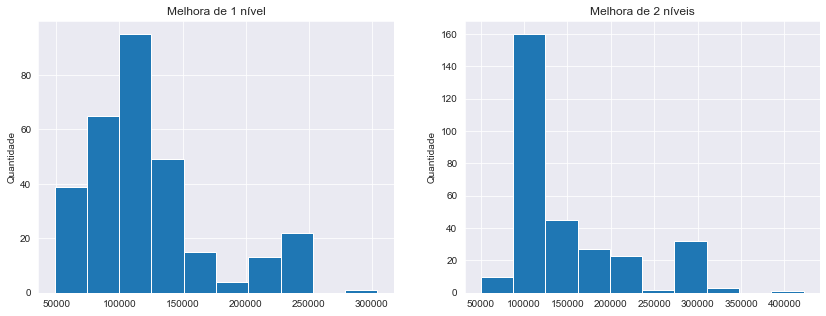

	gains_level_1:

Mean:   121391
Median: 110190.0
St Deviation: 48884
Faixa de ganho mediano: entre [61306.0] e [159074.0]


	gains_level_2:

Mean:   150585
Median: 116707.0
St Deviation: 68292
Faixa de ganho mediano: entre [48415.0] e [184999.0]


In [263]:
plot_gains(gains_level_1, gains_level_2, 'renovated, condition e view')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.6 view e grade
    Condições
    
> predicted_sample.view += 1
>
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ view e grade ]


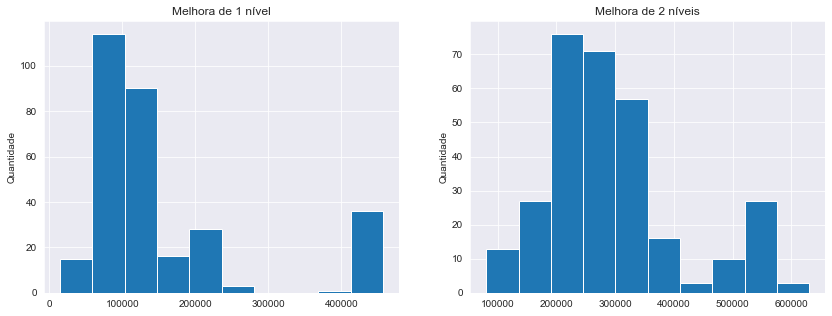

	gains_level_1:

Mean:   155009
Median: 113763.0
St Deviation: 112509
Faixa de ganho mediano: entre [1254.0] e [226272.0]


	gains_level_2:

Mean:   295701
Median: 267781.0
St Deviation: 111606
Faixa de ganho mediano: entre [156175.0] e [379387.0]


In [238]:
plot_gains(gains_level_1, gains_level_2, 'view e grade')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> if samples == 0: predicted_sample.view += 1
>
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ view e grade ]


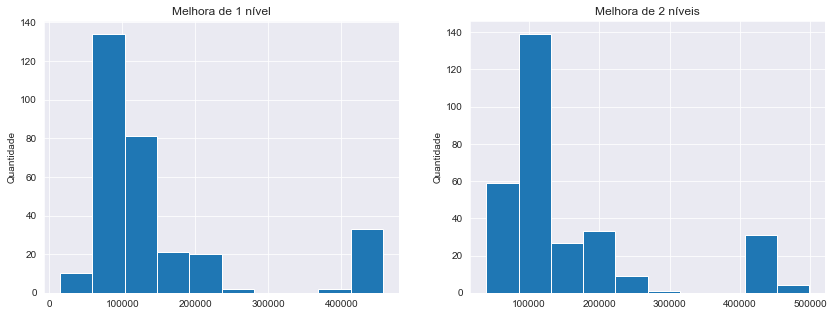

	gains_level_1:

Mean:   149760
Median: 107036.0
St Deviation: 109554
Faixa de ganho mediano: entre [-2518.0] e [216590.0]


	gains_level_2:

Mean:   153817
Median: 108031.0
St Deviation: 110723
Faixa de ganho mediano: entre [-2692.0] e [218754.0]


In [236]:
plot_gains(gains_level_1, gains_level_2, 'view e grade')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.view += 1
>
> if samples == 0: predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ view e grade ]


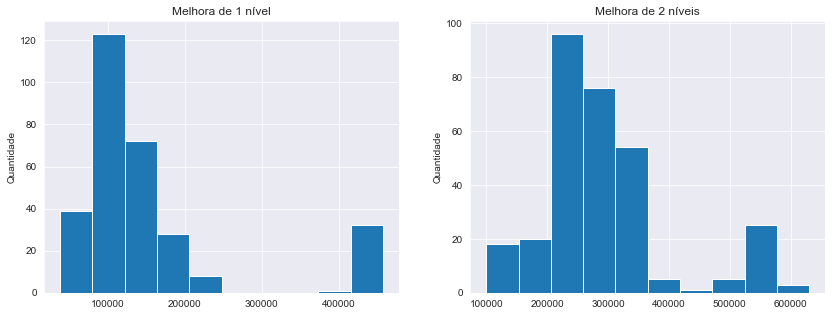

	gains_level_1:

Mean:   151395
Median: 114734.0
St Deviation: 106882
Faixa de ganho mediano: entre [7852.0] e [221616.0]


	gains_level_2:

Mean:   289300
Median: 269063.0
St Deviation: 105754
Faixa de ganho mediano: entre [163309.0] e [374817.0]


In [240]:
plot_gains(gains_level_1, gains_level_2, 'view e grade')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.7 renovated e grade
    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ renovated e grade ]


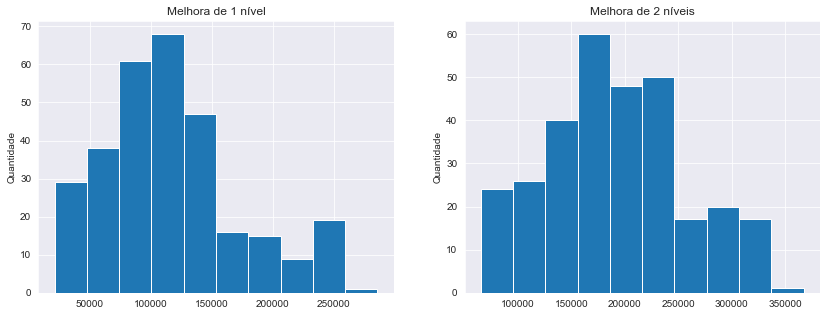

	gains_level_1:

Mean:   117954
Median: 113485.0
St Deviation: 55760
Faixa de ganho mediano: entre [57725.0] e [169245.0]


	gains_level_2:

Mean:   190578
Median: 186779.0
St Deviation: 63339
Faixa de ganho mediano: entre [123440.0] e [250118.0]


In [242]:
plot_gains(gains_level_1, gains_level_2, 'renovated e grade')
show_gains_details(gains_level_1, gains_level_2)

### 4.2.8 renovated e view
    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.view += 1

MUDANÇAS APLICADAS EM [ renovated e view ]


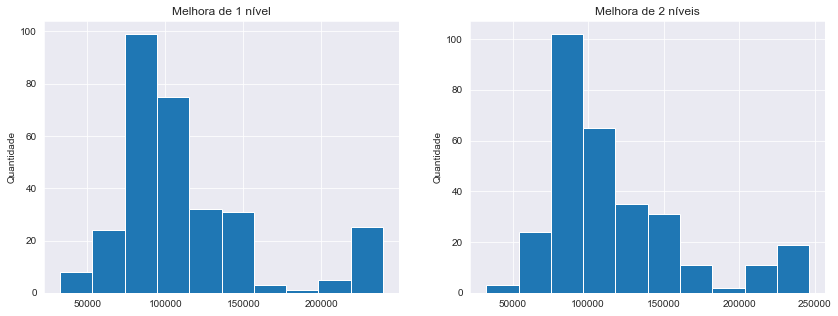

	gains_level_1:

Mean:   113960
Median: 97791.0
St Deviation: 46773
Faixa de ganho mediano: entre [51018.0] e [144564.0]


	gains_level_2:

Mean:   118348
Median: 104871.0
St Deviation: 46187
Faixa de ganho mediano: entre [58684.0] e [151058.0]


In [244]:
plot_gains(gains_level_1, gains_level_2, 'renovated e view')
show_gains_details(gains_level_1, gains_level_2)

###  4.2.9 renovated, view e grade
    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.view += 1
>
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ renovated, view e grade ]


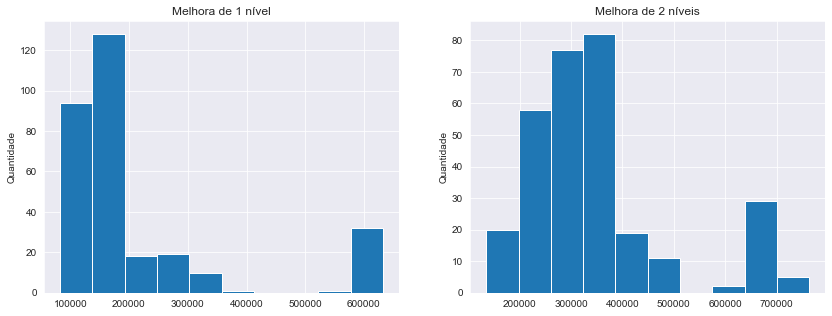

	gains_level_1:

Mean:   213941
Median: 162268.0
St Deviation: 150084
Faixa de ganho mediano: entre [12184.0] e [312352.0]


	gains_level_2:

Mean:   349293
Median: 321662.0
St Deviation: 139523
Faixa de ganho mediano: entre [182139.0] e [461185.0]


In [246]:
plot_gains(gains_level_1, gains_level_2, 'renovated, view e grade')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> if samples == 0: predicted_sample.view += 1
>
> predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ renovated, view e grade ]


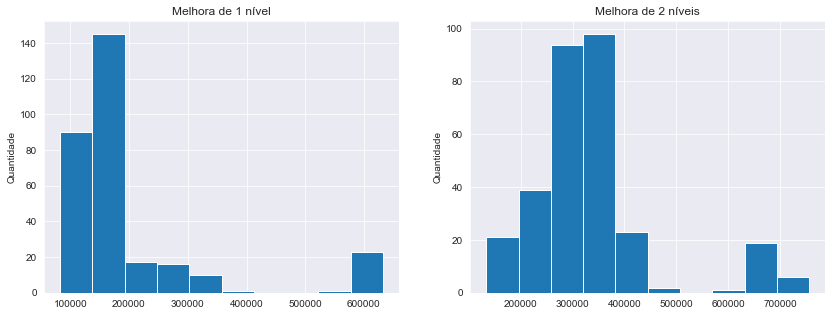

	gains_level_1:

Mean:   200133
Median: 164602.0
St Deviation: 131401
Faixa de ganho mediano: entre [33201.0] e [296003.0]


	gains_level_2:

Mean:   335804
Median: 318913.0
St Deviation: 124757
Faixa de ganho mediano: entre [194156.0] e [443670.0]


In [248]:
plot_gains(gains_level_1, gains_level_2, 'renovated, view e grade')
show_gains_details(gains_level_1, gains_level_2)

    Condições
    
> predicted_sample.renovated = 1
>
> predicted_sample.view += 1
>
> if samples == 0: predicted_sample.grade += 1

MUDANÇAS APLICADAS EM [ renovated, view e grade ]


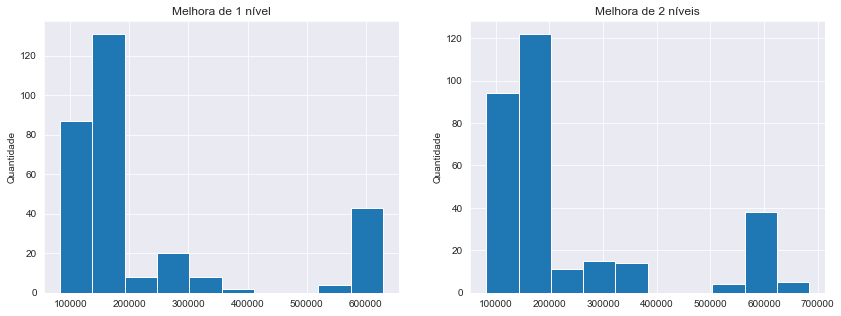

	gains_level_1:

Mean:   231893
Median: 164602.0
St Deviation: 168471
Faixa de ganho mediano: entre [-3869.0] e [333073.0]


	gains_level_2:

Mean:   236001
Median: 165622.0
St Deviation: 169219
Faixa de ganho mediano: entre [-3597.0] e [334841.0]


In [250]:
plot_gains(gains_level_1, gains_level_2, 'renovated, view e grade')
show_gains_details(gains_level_1, gains_level_2)

In [ ]:
    13.9 grade
    3.72 view
    0.73 condition 
    0.29 renovated
    0.15 bedrooms
    0.07 bathrooms

    obs: os resultados mostrados são sempre arrendondados (sempre para baixo)
         e apesar de utilizar o termo "média", os valores são derivados da 
         mediana (por a média ser influênciada por outliers).
    
         E o valor mostrado no README foi calculado com base na média entre o
         valor "médio" de acréscimo de [grade e renovated+grade] e [view e 
         renotaved+view].

## 4.3 Solução
**Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

**Em mudanças mais específicas o ideal seria focar no design (grade) e na vista (view).** Pois são os que mais incrementam o valor da casa (**em aproximadamente 50 mil**), com o design apresentando um range maior de crescimento (com aumentos que vão de 15 mil a 88 mil, enquanto a vista vai de 40 mil a 65 mil).

    Melhorar a condição, em geral eleva o preço em 20 mil dólares (entre um intervalo de 9 a 30 mil).

    Lembrando que aqui estamos falando de 1 nível de melhora (um grade 7 para 8 ou view de 2 para 3).
    Ao adicionarmos 2 níveis o imóvel se valoriza ainda mais em determinadas características (a média 
    de ganho de grade praticamente dobra indo para mais de 100 mil) enquanto outras não tem esse efeito 
    fortificado (view nos traz um leve aumento não chegando a ser 10% de melhora), o que nos leva a 
    investir em outras áreas.

Já em alterações que afetam múltiplas áreas, podemos olhar para o conjunto _[renovated, condition, grade e view]_. 

    renovated aqui seria o fato da casa estar recebendo uma reforma ou não (o que causa uma certa confusão
    na abstração do problema, já que fica a dúvida de o que seria considerado uma reforma? Elevar o design 
    pode ocorrer tanto por meio de reforma como por um processo sem reforma? O "tamanho" da mudança seria 
    o fator definidor?), então, por um lado poderíamos pensar em todas as mudanças como sendo reformas e 
    olhar para essa estrutura como apenas [condition, grade e view], visto que os outros processos também 
    a inclui. Portanto...
    
**O trio _[r, condition, grade e view]_ apresenta números bem empolgantes, elevando média de 165 mil dólares o preço da casa (dentro de um range de 20 a 310 mil).** Outra opção seria visar **_[renovated, view e grade]_ , por trazer um retorno aproximado de 160.000, embora varie entre 12 a 310 mil** (esses valores mínimos dos intervalos provavelmente derivam de casas que já estão em ótimas condições ou já foram reformadas antes, visto que ao examinar os resultados de _[view e grade]_ o mesmo ocorre, apenas em proporções menores _[110 mil --- de 1mil a 220mil]_ ).

**Ou, indo para um lado mais estável _[renovated, condition e view]_ é boa opção, por apresentar média de aumento de 100 mil variando de 65 a 150 mil.**

As outras combinações são relativamente parecidas...

    por exemplo: 
        renovated, condition e grade -- 119526 --- de 57191 a 181861
        renovated e grade ------------- 113485 --- de 57725 a 169245
        renovated e view -------------- 97791  --- de 51018 a 144564
        
Nos fazendo acreditar que, como renovated está frequentemente presente, quanto mais aspectos modificarmos, maior será o retorno. Em contra partida, o valor a ser investido também aumenta, podendo até diminuir o lucro no final. Nos levando a limitar as modificações para as já citadas ou para as individuais, fortalecidas pelo fato de renovated elevar bastante a média de crescimento do que já esperávamos que fosse bom e não elevar tanto o que pensávamos não ser tão bom.
    
        grade -------------- 50 mil           condition -------------- 20 mil
        renovated e grade -- 110 mil          renovated e condition -- 50 mil

Nesse sentido, podemos atuar em grade ou view de maneira "reformativa" ou sem reforma. Entretanto, essa abordagem acaba sendo abstrata e teórica, por não sabermos discernir o que as diferencia (no mundo real).

E por fim, devemos lembrar que...

        As evoluções citadas até agora se referem a alterações de dois níveis ao mesmo tempo.
        grade +=1 e view =+1. Porém, e se melhorarmos 2 níveis de 1 e somente 1 e outra característica?
        
**_[renovated, view e grade]_ se mostra uma opção talvez mais estável ao limitarmos os gastos com view a melhoria de apenas 1 nível por a média de retorno ser de também 160 mil mas com uma variância menor (30 a 290 mil).**

**O mesmo para _[r, condition, grade e view]_ onde temos os parâmetros _[165 mil --- de 30 a 300 mil]_ .**       